Executive summary
The purpose of this exercise was to
1. Analyse the salary details and see if we can find a good model capable of imputing/predicting the salaries in the missing rows.
All the salaries were first classified into 7 different classes 
(742750.0, 1475000.0]     610
(1475000.0, 2200000.0]    256
(2200000.0, 2925000.0]    102
(2925000.0, 3650000.0]     35
(4375000.0, 5100000.0]     13
(3650000.0, 4375000.0]     12
(6550000.0, 7275000.0]      4
(7275000.0, 8000000.0]      3
(5825000.0, 6550000.0]      2
(5100000.0, 5825000.0]      1
Here the last 4 classes were combined to take care of the long tail of the salaries. Due to the severe class imbalance, the model was upscaled to ensure that all the classes have an adequate representation. After trying out multiple models, we finalized on an ensemble method of logistics and SVC (rbf) based model with soft voting criteria as it had a test accuracy of 76% with a standard deviation of 1.2%. We successfully imputed all the missing values to get the salaries for all the rows with missing salaries. The distribution of the final salaries is quite similar to that of the original salaries which acts as a sanity check for the predictions.
2. After the salary predictions the next step was to find out any trend in the titles and see if there was a way to predict the title based on the remaining parameters. 
After trying out multiple models including SVC, Decision tree, Random forest, Adaboost and ensemble, we reach the conclusion that the titles cannot be predicted in an accurate enough manner. So we decided to go with unsupervised classifications to see if we can extract meaning out of the data.
3. Unsupervised classification: After trying out multiple classes, we were able to find a good classification at 6 levels with KNN. The meaning of these classes and their associated cluster names were derived by performing the Tukey test.

Cluster 0:  
Cluster name: Townie
Identifiers: 
1. These are the jobs located in all the small cities
2. Most of the titles in this cluster are related to Developers and Engineers
3. Low experience requirement of 3 to 7 years with very low salary expectations of less than INR 14,75,000 (AUD 29500)
Skills: SQL, HTML and Java

Cluster 1:  
Cluster name: Fresher
Identifiers: 
1. With very low experience requirement, they are most likely to be fresh college graduates. 
2. Almost all the jobs in NCR are in this cluster with a high concentration in other major cities of Hyd, Pune, Mumbai, Bangalore and Chennai. 
3. Most of the titles for this cluster are Developers and Engineers. 
4. Lowest salary tier of less than INR 14,75,000 (AUD 29500)
Skills: SQL and generic software skills

Cluster 2:  
Cluster name: Leader
Identifiers: 
1. High job experience (with expectations of 6 to 10 years experience) 
2. Most of the job in Bangalore are in this cluster. 
3. They will almost never have the title of ’Analyst’
4. Most of the time the title is likely to have the keyword ‘Lead’, ‘Senior’ or ‘Engineer’
5. This cluster falls in the highest salary level typically in the range of upwards to INR 29,25,000 (60,000 AUD)
Skills: SQL, Python, Algorithms, Java

Cluster 3:  
Cluster name: Manager
Identifiers: 
Extremely high experience (with expectations of 8 to 12 years experience) 
They are highly likely to have a managerial role
Very high salaries typically in the range of upwards to INR 22,00,000 (AUD 44,000)
Skills: SQL, Project Management, Six Sigma, Python and Oracle

Cluster 4:  
Cluster name: Local Hotshot
Identifiers: 
Similar to Townie Cluster with respect to small town location
Likely to have much higher experience than Townies in the range of 5 to 10 years
Most likely to have titles like Architect, Consultant or even Lead with similar salary range of Fresher
Skills: SQL, HTML, Six Sigma, Python and Oracle

Cluster 5:  
Cluster name: Hyder
Identifiers: 
Limited to the city of Hyderabad
Average Salary and experience requirements
Most likely to not be in NCR
Most likely salary to be in the similar range to fresher
Skills: SQL, HTML, Java, Python, C and Oracle


In [1]:
#Importing from naukri.com which is one of the biggest job portals for Indian market
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select,WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import LabelEncoder
link='https://www.naukri.com/data-jobs'

In [2]:
##Scraping on 13th Dec 2017
##Dont run this code again unless you want to start from scratch; just move to the next block
# df=pd.DataFrame([])
# count=1
# driver = webdriver.Chrome(executable_path="./chromedriver")
# driver.get(link)
# sleep(1)
# select=driver.find_element_by_id("salary_dd")
# select.click()
# option = select.find_element_by_id("a10")
# sleep(1)
# option.click()
# driver.find_element_by_id("qsbFormBtn").click()
# while driver.find_elements_by_link_text('Next'):
#     company=[]
#     title=[]
#     experience=[]
#     location=[]
#     skills=[]
#     salary=[]
#     dates=[]
#     html=driver.page_source
#     soup=bs(html,'lxml')
#     for com in soup.findAll('span',{'itemprop':'hiringOrganization'}):
#         company.append(com.text.encode("utf-8"))
#     for tit in soup.findAll('li',{'itemprop':'title'}):
#         title.append(tit.text.encode("utf-8"))
#     for exp in soup.findAll('span',{'itemprop':'experienceRequirements'}):
#         experience.append(exp.text.encode("utf-8"))
#     for loc in soup.findAll('span',{'itemprop':'jobLocation'}):
#         location.append(loc.text.encode("utf-8"))
#     for sk in soup.findAll('span',{'itemprop':'skills'}):
#         skills.append(sk.text.encode("utf-8"))
#     for sal in soup.findAll('span',{'itemprop':'baseSalary'}):
#         salary.append(sal.text.encode("utf-8"))
#     for date in soup.findAll('span',{'class':'date'}):
#         dates.append(date.text.encode("utf-8")) 
#     driver.find_element_by_link_text('Next').click()
#     df1=pd.DataFrame([company,title,experience,location,skills,salary,dates],index=['Company','Title','Experience','Location','Skills','Salary','Dates'])
#     df=pd.concat([df,df1],axis=1)    
# df.T.reset_index()
# #last page is remaining. Lets add that page manually
# company=[]
# title=[]
# experience=[]
# location=[]
# skills=[]
# salary=[]
# dates=[]
# html=driver.page_source
# soup=bs(html,'lxml')
# for com in soup.findAll('span',{'itemprop':'hiringOrganization'}):
#     company.append(com.text.encode("utf-8"))
# for tit in soup.findAll('li',{'itemprop':'title'}):
#     title.append(tit.text.encode("utf-8"))
# for exp in soup.findAll('span',{'itemprop':'experienceRequirements'}):
#     experience.append(exp.text.encode("utf-8"))
# for loc in soup.findAll('span',{'itemprop':'jobLocation'}):
#     location.append(loc.text.encode("utf-8"))
# for sk in soup.findAll('span',{'itemprop':'skills'}):
#     skills.append(sk.text.encode("utf-8"))
# for sal in soup.findAll('span',{'itemprop':'baseSalary'}):
#     salary.append(sal.text.encode("utf-8"))
# for date in soup.findAll('span',{'class':'date'}):
#     dates.append(date.text.encode("utf-8")) 
# df1=pd.DataFrame([company,title,experience,location,skills,salary,dates],index=['Company','Title','Experience','Location','Skills','Salary','Dates'])
# df=pd.concat([df,df1],axis=1)
# df=df.T.reset_index(drop='index')
# df.to_csv("data.csv")

In [3]:
df=pd.read_csv('/Users/VoldyArroW/Desktop/data.csv',index_col=0)

In [4]:
df[df['Dates'].isnull()]

,Company,Title,Experience,Location,Skills,Salary,Dates
50,Anantha,Analytics Platform Developer - Big Data/hadoop...,5-10 yrs,Chennai,"Hive, Advanced Java, Mapreduce, NoSQL, Hadoop,...",Not disclosed,NaN


In [5]:
#For the first data point,due to its recency, there is no date given so it keeps the value as NaN which 
# is shifted to the end of the first iteration i.e. 50th row. We will shift all the values one down to correct this
for i in range(1,50):
    df.loc[51-i,'Dates']=df.loc[50-i-1,'Dates']

In [6]:
#Checking for null values again!
df[df['Dates'].isnull()]

,Company,Title,Experience,Location,Skills,Salary,Dates


In [7]:
#Our next job will be to filter the data
#Lets drop all the rows whose title contain UI
df=df.drop(df[df['Title'].str.contains('UI')].index)
#Our next job will be to filter the data
#Lets drop all the rows whose title contain UX
df=df.drop(df[df['Title'].str.contains('UX')].index)
#Our next job will be to filter the data
#Lets drop all the rows whose title contain Designer
df=df.drop(df[df['Title'].str.contains('Designer')].index)
#Our next job will be to filter the data
#Lets drop all the Sales roles as well 
df=df.drop(df[df['Title'].str.contains('Sale')].index)
#Our next job will be to filter the data
#Lets drop all the Marketing roles as well 
df=df.drop(df[df['Title'].str.contains('Market')].index)
#Our next job will be to filter the data
#Lets drop all the Teaching roles as well 
df=df.drop(df[df['Title'].str.contains('Teach')].index)
#A lot of companies put up the same job again and again. Lets delete all the duplicates
df.drop_duplicates(['Company','Title','Experience','Location','Skills'],inplace=True)
#Our next job will be to filter the data
#Lets drop all the Finance roles as well 
df=df.drop(df[df['Skills'].str.contains('finance')].index)
#Our next job will be to filter the data
#Lets drop all the HR roles as well 
df=df.drop(df[df['Skills'].str.contains('HR')].index)
df=df.drop(df[df['Skills'].str.contains('human')].index)
#Our next job will be to filter the data
#Lets drop all the SCM roles as well 
df=df.drop(df[df['Skills'].str.contains('Supply Chain')|df['Skills'].str.contains('Procurement')].index)
#Our next job will be to filter the data
#Lets drop all the Data Entry roles as well 
df=df.drop(df[df['Skills'].str.contains('Entry')].index)
#Our next job will be to filter the data
#Lets drop all the Executive roles as well 
df=df.drop(df[df['Title'].str.contains('Executive')].index)

In [8]:
#Now that the data set is a bit clean, lets pick jobs which have python, SQL, Spark or Hadoop mentioned in the skills
df_new=df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('python')]
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('sql')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('spark')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('hadoop')]])

In [9]:
#Lets also include jobs which mention machine learning, neural network,nlp or deep learning or artificial
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('machine')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('deep')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('nlp')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('neural')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('artificial')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('algorithm')]])

In [10]:
#Checking out the new dataframe
df_new

,Company,Title,Experience,Location,Skills,Salary,Dates
0,Increff,Data Scientist,1-3 yrs,Bengaluru,"Python, Machine Learning, SQL, Spark, R, Selli...",Not disclosed,Few Hours Ago
16,Mphasis Limited,Big Data- Project Lead,7-10 yrs,Hyderabad,"Technical skills, Stores, Troubleshooting, Dat...",Not disclosed,1 day ago
20,Mphasis Limited,Big Data -project Lead,5-8 yrs,Bengaluru,"Technical skills, Stores, Troubleshooting, Dat...",Not disclosed,1 day ago
21,Mphasis Limited,Big Data- Module Lead,5-8 yrs,Chennai,"Technical skills, Stores, Troubleshooting, Dat...",Not disclosed,1 day ago
22,Mphasis Limited,Big Data Module Lead,5-8 yrs,Hyderabad,"Technical skills, Stores, Troubleshooting, Dat...",Not disclosed,1 day ago
32,HuQuo,Big Data Consultant - Python/r/java/hadoop/hive+,1-4 yrs,"Delhi NCR, Gurgaon","SQL, Hadoop, Java, C++, Python, Big Data, Stat...",Not disclosed,1 day ago
44,JoulestoWatts,Senior Data Engineer - Java / Scala / Python,5-10 yrs,Bengaluru,"Spark, NoSQL, SCALA, Java, Hadoop, Data Scienc...",Not disclosed,1 day ago
46,Mphasis Limited,Big Data - Module Lead,5-8 yrs,Mumbai,"Technical skills, Stores, Troubleshooting, Dat...",Not disclosed,1 day ago
50,Anantha,Analytics Platform Developer - Big Data/hadoop...,5-10 yrs,Chennai,"Hive, Advanced Java, Mapreduce, NoSQL, Hadoop,...",Not disclosed,1 day ago
57,Premium,Head - Data Sciences,12-15 yrs,Mumbai,"c, r, python, machine learning, sas, sql, java...",Not disclosed,1 day ago


In [11]:
#Its possible that some of the jobs might get repeated due to multiple skills being listed. Lets drop duplicates here
df_new=df_new.drop_duplicates()
#Lets check which elements were not considered in our final DataFrame
df[~df.isin(df_new)].dropna()

,Company,Title,Experience,Location,Skills,Salary,Dates
2,EYGBS (India) Private Limited,Manager - Data Sciences,9-14 yrs,Bengaluru,"Project Delivery, Team Management Skills, SCOP...",Not disclosed,Few Hours Ago
4,HuQuo,Senior Business Analyst / Assistant Manager - ...,3-5 yrs,Delhi NCR,"data quality, data profiling, oracle, trillium...",Not disclosed,Few Hours Ago
7,AERONUBE TECHNOLOGY PRIVATE LIMITED,Data Analyst | IT MNC | Bangalore,3-5 yrs,Bengaluru,"R Programming, Tableau, AWS Redshift",Not disclosed,1 day ago
9,Premium,Senior Data Analyst - BFSI Domain,7-12 yrs,Mumbai,"data analysis, data analytics, business analys...",Not disclosed,1 day ago
11,Talific Consulting Services Pvt. Ltd.,Am-data Analyst/business Analyst-no.1 -Car MNC...,3-5 yrs,Delhi(Jasola),"Regression Analysis, SAS, R, Data Analysis, Pr...","5,00,000 - 10,00,000 P.A.",1 day ago
12,CORPORATE ACCESS,Manager - Data Quality Profiling,6-9 yrs,Bengaluru,"Data Profiling, Data Quality, Data Analysis, D...",Not disclosed,1 day ago
13,XL India Business Services Pvt. Ltd.,Data Engineer,2-7 yrs,Wroclaw,"general insurance, data modeling, data managem...",Not disclosed,1 day ago
14,Markit India Services Private Limited,Sr Data Transformation Analyst I,5-8 yrs,Bengaluru,"Senior Analyst, Telecom, Automation, RF, Autom...",Not disclosed,1 day ago
17,Mphasis Limited,Data Engineering- Module Lead,5-8 yrs,Bengaluru,"Application development, Performance tuning, T...",Not disclosed,1 day ago
19,Mphasis Limited,Business Intelligence / Data Warehousing - Pro...,7-10 yrs,Bengaluru,"Business Intelligence, Data warehousing, Cogno...",Not disclosed,1 day ago


In [12]:
#Lets also include jobs which mention Data in their title
df_new=pd.concat([df_new,df[df['Title'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('data')]])
#Lets also include jobs which mention Regression or big data in skills or title
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('regression')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('big data')]])
df_new=pd.concat([df_new,df[df['Title'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('big data')]])
df_new=df_new.sort_index().drop_duplicates()

In [13]:
#I think we have all the relavant values in the df_new that we wanted
#Lets see how many columsn for the Salary have values in them
df_new[df_new['Salary']!='  Not disclosed '].shape[0]

1098

In [14]:
#Armed with 1096 salary values, lets clean up all the columns!
df_new['Company'].value_counts().head(20)

Premium                                     1624
Global Recruiters                            136
JPMorgan Chase                               132
Wipro Limited                                124
HuQuo                                         94
Mphasis Limited                               93
Accenture                                     92
Amazon India Software Dev Centre Pvt Ltd      88
Larsen & Toubro Infotech Limited              84
Squircle IT Consulting Services Pvt Ltd       81
Confidential                                  78
Elite Tech Recruiters                         70
Cisco Systems (India) Private Limited         67
HuQuo Consulting Pvt. Ltd.                    62
Pentagon Consultancy Services                 59
Oracle India Pvt. Ltd.                        56
Rinalytics Advisors Pvt. Ltd                  54
DM CONSULTING (INDIA) PVT LTD                 46
Accenture Solutions Pvt Ltd                   43
Technosoft Global Services Pvt Ltd            41
Name: Company, dtype

In [15]:
#Premium and Global Recruiters are terms used by recruitment agencies. Other than that the data looks clean.
#Lets focus on the next column- Title
df_new=df_new.reset_index()
df_new=df_new.drop('index',axis=1)

In [16]:
#Defining a function to clean the titles based on some key words
def titleclean(x):
    if 'lead' in x.lower() or 'senior' in x.lower():
        return 'Lead'
    elif 'manage' in x.lower():
        return 'Manager'
    elif 'scientist' in x.lower():
        return 'Scientist'
    elif 'developer' in x.lower():
        return 'Developer'
    elif 'engineer' in x.lower():
        return 'Engineer'
    elif 'analys' in x.lower():
        return 'Analyst'
    elif 'architect' in x.lower():
        return 'Architect'
    elif 'consult' in x.lower():
        return 'Consultant'
    else:
        return 'Generic'
    

In [17]:
#Lets check out the distribution of the titles now
df_new['Title_new']=df_new['Title'].map(titleclean)
df_new['Title_new'].value_counts()

Lead          2704
Developer     2166
Generic       1865
Engineer      1505
Manager        890
Architect      726
Scientist      469
Analyst        415
Consultant     275
Name: Title_new, dtype: int64

In [18]:
#Having cleaned the Titles, lets clean the next column- Experience
df_new['Experience'].unique()
#Lets split this into min and max years
def ExpCleaner_min(x):
    a=x.split(' ')
    b=a[0].split('-')
    return int(b[0])
def ExpCleaner_max(x):
    a=x.split(' ')
    b=a[0].split('-')
    return int(b[1])
df_new['Exp_min']=df_new['Experience'].map(ExpCleaner_min)
df_new['Exp_max']=df_new['Experience'].map(ExpCleaner_max)

In [19]:
#Having cleaned the Experience, lets clean the next column- Location
#Some of the jobs have multiple locations posted, we will consider for the sake of arguement that the employer is 
#looking for 1 in each location
def NCR(x):
    if 'Delhi' in str(x):
        return 1
    elif 'NCR' in str(x):
        return 1
    elif 'Gurgaon' in str(x):
        return 1
    elif 'Noida' in str(x):
        return 1
    else:
        return 0
def Hyd(x):
    if 'Hyd' in str(x):
        return 1
    else:
        return 0
def Pune(x):
    if 'Pune' in str(x):
        return 1
    else:
        return 0
def Mumbai(x):
    if 'Mumbai' in str(x):
        return 1
    else:
        return 0
def Bangalore(x):
    if 'Bengaluru' in str(x):
        return 1
    elif 'Bangalore' in str(x):
        return 1
    else:
        return 0
def Chennai(x):
    if 'Chennai' in str(x):
        return 1
    else:
        return 0
def Ahmedabad(x):
    if 'Ahmedabad' in str(x):
        return 1
    else:
        return 0
def Kolkata(x):
    if 'Kolkata' in str(x):
        return 1
    else:
        return 0
def Kochi(x):
    if 'Kochi' in str(x):
        return 1
    else:
        return 0
def Jaipur(x):
    if 'Jaipur' in str(x):
        return 1
    else:
        return 0
def Trivandrum(x):
    if 'Trivandrum' in str(x):
        return 1
    else:
        return 0
def Indore(x):
    if 'Indore' in str(x):
        return 1
    else:
        return 0
def Coimbatore(x):
    if 'Coimbatore' in str(x):
        return 1
    else:
        return 0
def OthersLoc(row):
    if row['NCR']==0:
        if row['Hyd']==0:
            if row['Pune']==0:
                if row['Mumbai']==0:
                    if row['Bangalore']==0:
                        if row['Chennai']==0:
                            if row['Ahmedabad']==0:
                                if row['Kolkata']==0:
                                    if row['Kochi']==0:
                                        if row['Jaipur']==0:
                                            if row['Trivandrum']==0:
                                                if row['Indore']==0:
                                                    if row['Coimbatore']==0:
                                                        return 1
    else:
        return 0
df_new['NCR']=df_new['Location'].map(NCR)
df_new['Hyd']=df_new['Location'].map(Hyd)
df_new['Pune']=df_new['Location'].map(Pune)
df_new['Mumbai']=df_new['Location'].map(Mumbai)
df_new['Bangalore']=df_new['Location'].map(Bangalore)
df_new['Chennai']=df_new['Location'].map(Chennai)
df_new['Ahmedabad']=df_new['Location'].map(Ahmedabad)
df_new['Kolkata']=df_new['Location'].map(Kolkata)
df_new['Kochi']=df_new['Location'].map(Kochi)
df_new['Hyderabad']=df_new['Location'].map(Hyderabad)
df_new['Jaipur']=df_new['Location'].map(Jaipur)
df_new['Trivandrum']=df_new['Location'].map(Trivandrum)
df_new['Indore']=df_new['Location'].map(Indore)
df_new['Coimbatore']=df_new['Location'].map(Coimbatore)
df_new['OthersLoc']=df_new.apply(OthersLoc,axis=1)

In [20]:
#Filling the OtherLoc column as 0 for all the NA values
df_new['OthersLoc']=df_new['OthersLoc'].fillna(0)

In [21]:
#Moving on to the next column- Skills
df_new['Skills_list']=df_new['Skills'].str.split(',')
for i in range(df_new.shape[0]):
    df_new['Skills_list'][i][-1]=df_new['Skills_list'][i][-1].split('.')[0]

In [22]:
#Moving on to the next column- Salary
#Checking out the unique values here
df_new['Salary'].unique()

array(['  Not disclosed ',
       '    14,00,000 - 17,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    5,00,000 - 10,00,000 P.A.  ',
       '    10,00,000 - 20,00,000 P.A. 10 to 45L  ',
       '    5,00,000 - 15,00,000 P.A. Salary is not a concern for t...  ',
       '    10,00,000 - 20,00,000 P.A.  ',
       '    7,00,000 - 10,00,000 P.A.  ',
       '    9,50,000 - 14,00,000 P.A.  ',
       '    12,00,000 - 14,00,000 P.A.  ',
       '    15,00,000 - 25,00,000 P.A.  ',
       '    40,00,000 - 45,00,000 P.A.  ',
       '    27,50,000 - 32,50,000 P.A.  ',
       '    5,50,000 - 12,00,000 P.A.  ',
       '    15,00,000 - 30,00,000 P.A.  ',
       '    25,00,000 - 40,00,000 P.A.  ',
       '    15,00,000 - 18,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    11,00,000 - 16,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    15,00,000 - 20,00,000 P.A.  ',
       '    10,00,000 - 13,00,000 P.A.  ',
       '    8,50,000 - 10,00,000 P.A.  ',
       '    6,50,000 - 

In [23]:
#Lets put all the 'Not disclosed' salaries as NA
df_new.loc[:,'Salary'][df_new['Salary']=='  Not disclosed ']='NA'

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
#Checking all the non NA values
df_new[~(df_new['Salary']=='NA')]['Salary'].unique()

array(['    14,00,000 - 17,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    5,00,000 - 10,00,000 P.A.  ',
       '    10,00,000 - 20,00,000 P.A. 10 to 45L  ',
       '    5,00,000 - 15,00,000 P.A. Salary is not a concern for t...  ',
       '    10,00,000 - 20,00,000 P.A.  ',
       '    7,00,000 - 10,00,000 P.A.  ',
       '    9,50,000 - 14,00,000 P.A.  ',
       '    12,00,000 - 14,00,000 P.A.  ',
       '    15,00,000 - 25,00,000 P.A.  ',
       '    40,00,000 - 45,00,000 P.A.  ',
       '    27,50,000 - 32,50,000 P.A.  ',
       '    5,50,000 - 12,00,000 P.A.  ',
       '    15,00,000 - 30,00,000 P.A.  ',
       '    25,00,000 - 40,00,000 P.A.  ',
       '    15,00,000 - 18,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    11,00,000 - 16,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    15,00,000 - 20,00,000 P.A.  ',
       '    10,00,000 - 13,00,000 P.A.  ',
       '    8,50,000 - 10,00,000 P.A.  ',
       '    6,50,000 - 12,00,000 P.A.  ',
       '

In [25]:
#Since these indicate readings for location Belgium
df_new=df_new.drop(df_new[df_new['Salary']=='    45,000 - 50,000 P.A.  '].index)
#Since these indicate readings for location Canada
df_new=df_new.drop(df_new[df_new['Salary']=='    35,000 - 45,000 P.A.  '].index)
# Work from home role which is likely to skew all the readings
df_new=df_new.drop(df_new[df_new['Salary']=='    1,00,000 P.A.  '].index)
#Australia and Canada roles
df_new=df_new.drop(df_new[df_new['Salary']=='    45,000 - 60,000 P.A.  '].index)
# Work from home role which is likely to skew all the readings
df_new=df_new.drop(df_new[df_new['Salary']=='    1,00,000 & above P.A.  '].index)
# Work from home role which is likely to skew all the readings
df_new=df_new.drop(df_new[df_new['Salary']=='    60,000 P.A.  '].index)
#Checking if there is any salary reading without '-' or NA
df_new[~((df_new['Salary'].str.contains('-')) | (df_new['Salary']=='NA'))]

,Company,Title,Experience,Location,Skills,Salary,Dates,Title_new,Exp_min,Exp_max,...,Ahmedabad,Kolkata,Kochi,Hyderabad,Jaipur,Trivandrum,Indore,Coimbatore,OthersLoc,Skills_list


In [26]:
df_new[df_new['Salary'].str.contains('Cr')]

,Company,Title,Experience,Location,Skills,Salary,Dates,Title_new,Exp_min,Exp_max,...,Ahmedabad,Kolkata,Kochi,Hyderabad,Jaipur,Trivandrum,Indore,Coimbatore,OthersLoc,Skills_list
240,Quess Corp Ltd.,Sap-master Data Governan - CMMi Level5 Company...,4-9 yrs,"Hyderabad, Bengaluru","SAP MDG, SAP Master Data Governance, SAP Webdy...","40,00,000 - 1 Cr & above P.A.",6 days ago,Generic,4,9,...,0,0,0,1,0,0,0,0,0.0,"[SAP MDG, SAP Master Data Governance, SAP We..."
260,Quess Corp Ltd.,Sap-master Data Governan - CMMi Level5 Company...,4-9 yrs,"Bengaluru, Delhi NCR","Demandware, Demand Ware","40,00,000 - 1 Cr & above P.A.",6 days ago,Generic,4,9,...,0,0,0,0,0,0,0,0,0.0,"[Demandware, Demand Ware]"
1342,ABC Consultants Pvt Ltd,Data Architect role with World's Largest Banki...,10-16 yrs,Bengaluru,"sql, spark, hadoop, scala, etl, tableau, busin...","40,00,000 - 1 Cr & above P.A.",20 days ago,Architect,10,16,...,0,0,0,0,0,0,0,0,0.0,"[sql, spark, hadoop, scala, etl, tableau,..."
2430,SUPERIOR TALENT INDIA PRIVATE LIMITED,Opportunity for Core java VP IC Role/tech Lead...,7-12 yrs,Bengaluru,"java, core java, algorithms, multithreading, m...","50,00,000 - 1 Cr & above P.A.",7 days ago,Lead,7,12,...,0,0,0,0,0,0,0,0,0.0,"[java, core java, algorithms, multithreadin..."
2446,ABC Consultants Pvt Ltd,"Solution Architect, Enterprise Architect",12-16 yrs,"Delhi NCR, Chennai, Kolkata","solution architecture, enterprise architect, l...","40,00,000 - 1 Cr & above P.A.",5 days ago,Architect,12,16,...,0,1,0,0,0,0,0,0,0.0,"[solution architecture, enterprise architect,..."
4610,Staffopedia Consulting LLP,Trading Infrastructure Developer,3-8 yrs,Bengaluru,"Data Structures, Algorithms, C++, Python, Linu...","50,00,000 - 1 Cr & above P.A.",19 days ago,Developer,3,8,...,0,0,0,0,0,0,0,0,0.0,"[Data Structures, Algorithms, C++, Python, ..."


In [27]:
#Cleaning the salary column
import re
def CleanSalary_min(x):
    if x=='NA':
        return 'NA'
    else:
        a=re.findall('\W*(.*?) P.A.',x)
        b=a[0].split('-')
        return int(b[0].split(',')[0])*100000
def CleanSalary_max(x):
    if x=='NA':
        return 'NA'
    else:
        a=re.findall('\W*(.*?) P.A.',x)
        b=a[0].split('-')
        if 'Cr' in b[1].split(',')[0]:
            return 10000000
        else:
            return int(b[1].split(',')[0])*100000
df_new['Salary_min']=df_new['Salary'].map(CleanSalary_min)
df_new['Salary_max']=df_new['Salary'].map(CleanSalary_max)


In [28]:
#Dropping all the old columns
df_new=df_new.drop(['Title','Experience','Skills','Salary'],axis=1)

In [29]:
#Cleaning the date column
df_new['Dates'].unique()

array(['Few Hours Ago', '1 day ago', '2 days ago', '8 days ago',
       '5 days ago', '3 days ago', '7 days ago', '6 days ago',
       '4 days ago', '26 days ago', '15 days ago', '44 days ago',
       '13 days ago', '12 days ago', '14 days ago', '9 days ago',
       '16 days ago', '21 days ago', '29 days ago', '28 days ago',
       '20 days ago', '22 days ago', '27 days ago', '33 days ago',
       '23 days ago', '30 days ago', '11 days ago', '51 days ago',
       '50 days ago', '56 days ago', '46 days ago', '48 days ago',
       '47 days ago', '57 days ago', '35 days ago', '41 days ago',
       '34 days ago', '43 days ago', '37 days ago', '61 days ago',
       '36 days ago', '40 days ago', '49 days ago', '54 days ago',
       '58 days ago', '42 days ago', '19 days ago', '18 days ago',
       '60 days ago', '135 days ago', '153 days ago', '99 days ago',
       '39 days ago', '100 days ago', '104 days ago', '133 days ago',
       '31 days ago', '55 days ago', '45 days ago', '32 days ago'

In [30]:
df_new=df_new.reset_index().drop('index',axis=1)

In [31]:
def dateclean(x):
    if x=='Few Hours Ago':
        return 0
    elif x=='1 day ago':
        return 1
    else:
        a=re.findall('(.*) days ago',x)
        return int(a[0])
df_new['Dates_new']=df_new['Dates'].map(dateclean)
# dateclean('21 days ago')

In [32]:
df_new[['Dates_new','Dates']]

,Dates_new,Dates
0,0,Few Hours Ago
1,0,Few Hours Ago
2,0,Few Hours Ago
3,0,Few Hours Ago
4,1,1 day ago
5,1,1 day ago
6,1,1 day ago
7,1,1 day ago
8,1,1 day ago
9,1,1 day ago


In [33]:
#Removing dates column
df_new.drop('Dates',axis=1,inplace=True)

In [34]:
df_new=pd.concat([df_new,pd.get_dummies(df_new['Title_new'],prefix='Title')],axis=1)

In [35]:
df_new.drop('Title_Generic',axis=1,inplace=True) #Taking Generic as the base in the Titles

In [36]:
#Scanning the Locations again to ensure that all the locations are India based to ensure consistency in salaries
df_new[:500][df_new['OthersLoc']==1][['Location']]

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Location
12,Wroclaw
76,India
80,United Kingdom (U.K)
96,Anywherein India
135,United Kingdom (U.K)
136,India
157,Nagercoil
174,Singapore
176,Dubai/ UAE
213,Anywherein India


In [37]:
#Lets remove all the non-India based jobs to have a better benchmark on the salary numbers and requirements
df_new=df_new.drop([12,80,135,174,176,222,321,325,367,371,500,519,523,524,532,557,559,657,658,697,782,915,918,1107,1194,1225,\
                  1229,1364,1437,1481,1482,1522,8483,8482,8481,8480,8471,9737,10851,10900,8484,8468,8121,7290,7291,7309,\
                  7343,1527,1530,1564,1824,1847,1849,1866,1867,1882,1907,1995,2065,2118,2128,2138,2308,2485,2520,2608,\
                  2766,2777,2821,2870,2871,2945,2946,3155,3177,3190,3321,3432,3432,3453,3454,3463,3493,3579,3673,3757,\
                  3814,3841,3872,3950,4053,4404,4559,4575,4676,4828,4829,5136,5143,5160,5170,5177,5180,5190,5263,\
                  5303,5336,5338,5341,5383,5384,5433,5500,5523,5729,5873,5953,5954,6042,6335,6887,6886])

In [38]:
#Dropping the location column and reseting the index
df_new.drop('Location',axis=1,inplace=True)
df_new.reset_index().drop('index',axis=1,inplace=True)

In [93]:
#EDA
df_new.columns

Index([u'Company', u'Title_new', u'Exp_min', u'Exp_max', u'NCR', u'Hyd',
       u'Pune', u'Mumbai', u'Bangalore', u'Chennai', u'Ahmedabad', u'Kolkata',
       u'Kochi', u'Hyderabad', u'Jaipur', u'Trivandrum', u'Indore',
       u'Coimbatore', u'OthersLoc', u'Skills_list', u'Salary_min',
       u'Salary_max', u'Dates_new', u'Title_Analyst', u'Title_Architect',
       u'Title_Consultant', u'Title_Developer', u'Title_Engineer',
       u'Title_Lead', u'Title_Manager', u'Title_Scientist', u'Exp_avg',
       u'Predicted_Salary', u'Predicted_Salary_inverse'],
      dtype='object')

In [97]:
df_new.count()

Company                     10887
Title_new                   10887
Exp_min                     10887
Exp_max                     10887
NCR                         10887
Hyd                         10887
Pune                        10887
Mumbai                      10887
Bangalore                   10887
Chennai                     10887
Ahmedabad                   10887
Kolkata                     10887
Kochi                       10887
Hyderabad                   10887
Jaipur                      10887
Trivandrum                  10887
Indore                      10887
Coimbatore                  10887
OthersLoc                   10887
Skills_list                 10887
Salary_min                  10887
Salary_max                  10887
Dates_new                   10887
Title_Analyst               10887
Title_Architect             10887
Title_Consultant            10887
Title_Developer             10887
Title_Engineer              10887
Title_Lead                  10887
Title_Manager 

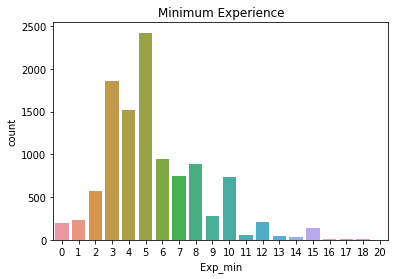

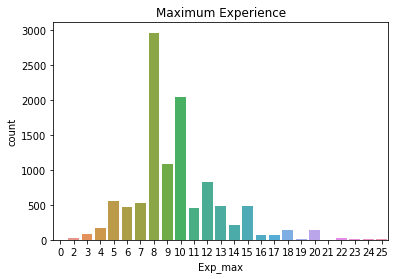

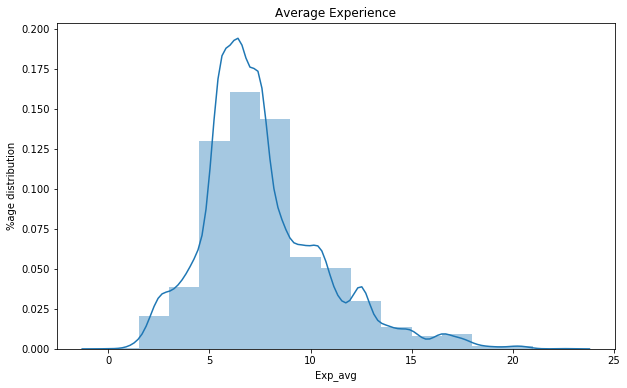

In [140]:
from scipy.stats import norm
sns.countplot(df_new['Exp_min']).set_title('Minimum Experience')
plt.show()
sns.countplot(df_new['Exp_max']).set_title('Maximum Experience')
plt.show()
plt.figure(figsize=(10,6))
sns.distplot(df_new['Exp_avg'],kde=True,bins=15).set_title('Average Experience')
plt.ylabel('%age distribution')
plt.show()

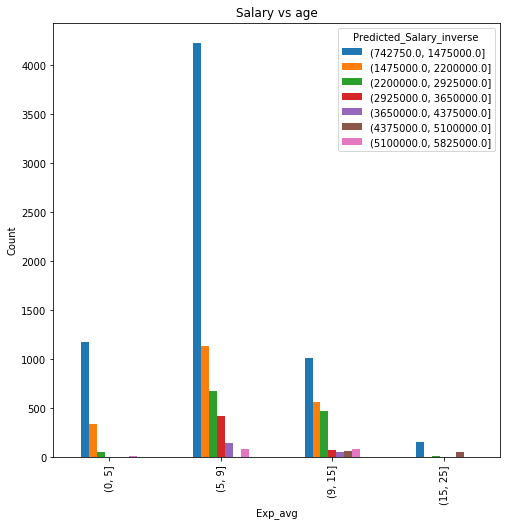

In [179]:

bins=[0, 5,9,15,25]
x = df_new.groupby(pd.cut(df_new['Exp_avg'], bins=bins))['Predicted_Salary_inverse'].value_counts()

x.unstack().plot.bar(figsize=(8,8))
plt.title('Salary vs age')
plt.ylabel('Count')
plt.show()

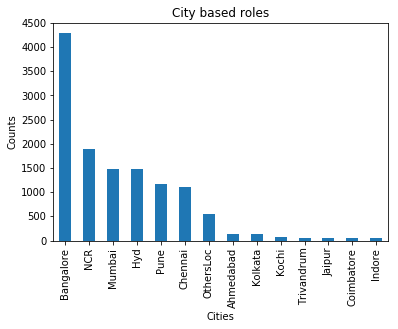

In [187]:
#Cities based jobs
df_new[['NCR','Hyd','Pune','Mumbai','Bangalore','Chennai','Ahmedabad','Kolkata','Kochi','Jaipur','Trivandrum','Indore','Coimbatore','OthersLoc']].sum().sort_values(ascending=False).plot.bar()
plt.xlabel('Cities')
plt.ylabel('Counts')
plt.title('City based roles')
plt.show()

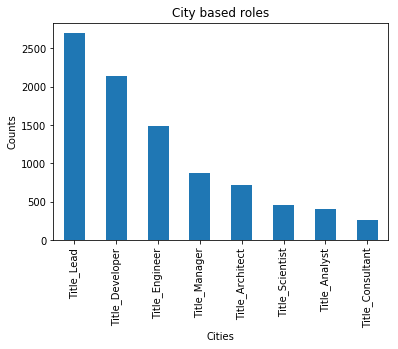

In [193]:
#Title based jobs
x=df_new[[c for c in df_new.columns if 'Title' in c]].drop('Title_new',axis=1).sum().sort_values(ascending=False)
plt.xlabel('Titles')
plt.ylabel('Counts')
plt.title('Titles based roles')
plt.show()

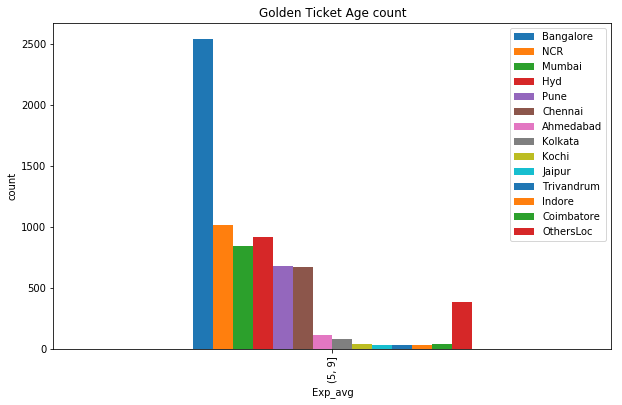

In [233]:
#City vs Age
x=df_new.groupby(pd.cut(df_new['Exp_avg'], bins=[5,9]))[['Bangalore','NCR','Mumbai','Hyd','Pune','Chennai','Ahmedabad','Kolkata','Kochi','Jaipur','Trivandrum','Indore','Coimbatore','OthersLoc']].sum()
x.plot.bar(figsize=(10,6))
plt.ylabel('count')
plt.title('Golden Ticket Age count')
plt.show()

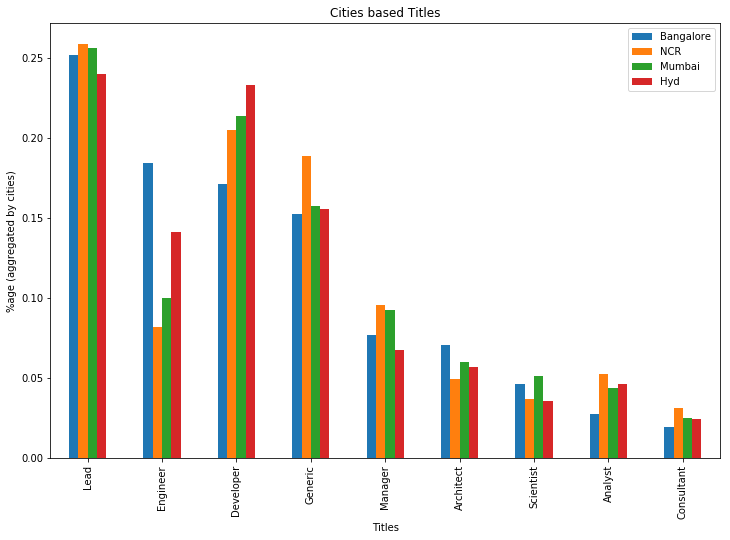

In [260]:
#Title vs city
x=df_new.groupby('Title_new')[['Bangalore','NCR','Mumbai','Hyd','Pune','Chennai','Ahmedabad','Kolkata','Kochi','Jaipur','Trivandrum','Indore','Coimbatore','OthersLoc']].sum()/df_new[['Bangalore','NCR','Mumbai','Hyd','Pune','Chennai','Ahmedabad','Kolkata','Kochi','Jaipur','Trivandrum','Indore','Coimbatore','OthersLoc']].sum()
x.sort_values('Bangalore',ascending=False).iloc[:,:4].plot.bar(figsize=(12,8))
plt.xlabel('Titles')
plt.ylabel('%age (aggregated by cities)')
plt.title('Cities based Titles')
plt.show()

In [39]:
#Separate out the rows with the salaries mentioned in them from those without
df_new_salary=df_new[df_new["Salary_min"]!='NA']
df_new_nosalary=df_new[df_new["Salary_min"]=='NA']

In [40]:
df_new_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 2 to 11003
Data columns (total 31 columns):
Company             1038 non-null object
Title_new           1038 non-null object
Exp_min             1038 non-null int64
Exp_max             1038 non-null int64
NCR                 1038 non-null int64
Hyd                 1038 non-null int64
Pune                1038 non-null int64
Mumbai              1038 non-null int64
Bangalore           1038 non-null int64
Chennai             1038 non-null int64
Ahmedabad           1038 non-null int64
Kolkata             1038 non-null int64
Kochi               1038 non-null int64
Hyderabad           1038 non-null int64
Jaipur              1038 non-null int64
Trivandrum          1038 non-null int64
Indore              1038 non-null int64
Coimbatore          1038 non-null int64
OthersLoc           1038 non-null float64
Skills_list         1038 non-null object
Salary_min          1038 non-null object
Salary_max          1038 non-null object
Dates

In [41]:
df_new_salary['Salary_min']=df_new_salary['Salary_min'].map(int)
df_new_salary['Salary_max']=df_new_salary['Salary_max'].map(int)

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [43]:
df_new_salary['Salary_avg']=(df_new_salary['Salary_min']+df_new_salary['Salary_max'])/2
df_new_salary['Exp_avg']=(df_new_salary['Exp_min']+df_new_salary['Exp_max'])/2
df_new['Exp_avg']=(df_new['Exp_min']+df_new['Exp_max'])/2

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
df_new_salary['Salary_avg']

2        1550000.0
10        750000.0
34       1500000.0
48       1000000.0
51       1500000.0
60        850000.0
61       1150000.0
66       1500000.0
70       1300000.0
74        750000.0
75       2000000.0
83       2950000.0
84        850000.0
87       2250000.0
91       3250000.0
92        850000.0
95       1500000.0
99       1650000.0
101      1350000.0
102      1350000.0
103      2250000.0
105      1750000.0
107      1750000.0
109      1150000.0
110       900000.0
140      1750000.0
143       900000.0
146      1300000.0
154      3500000.0
157      1100000.0
           ...    
10820    2500000.0
10823    3750000.0
10824    3750000.0
10838    2750000.0
10839    1500000.0
10840    8000000.0
10845    1750000.0
10849    1400000.0
10865    1600000.0
10871    4250000.0
10872    3250000.0
10875    6500000.0
10876    1400000.0
10883    1000000.0
10886     750000.0
10891    1400000.0
10897    1350000.0
10898    1350000.0
10899     750000.0
10902    1350000.0
10922    1300000.0
10945    140

In [45]:
#Lets treat this like a classification problem instead of a regression problem and try to predict the bins
df_new_salary['Salary_avg_bins']=pd.cut(df_new_salary['Salary_avg'],bins=10)
# print df_new_salary['Salary_avg_bins']
print df_new_salary['Salary_avg_bins'].value_counts()

(742750.0, 1475000.0]     610
(1475000.0, 2200000.0]    256
(2200000.0, 2925000.0]    102
(2925000.0, 3650000.0]     35
(4375000.0, 5100000.0]     13
(3650000.0, 4375000.0]     12
(6550000.0, 7275000.0]      4
(7275000.0, 8000000.0]      3
(5825000.0, 6550000.0]      2
(5100000.0, 5825000.0]      1
Name: Salary_avg_bins, dtype: int64


/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
#lets represent each of the bin with just one number using label encoder

LE=LabelEncoder()
df_new_salary['Salary_avg_bins']=LE.fit_transform(df_new_salary['Salary_avg_bins'])
print df_new_salary['Salary_avg_bins'].value_counts()

0    610
1    256
2    102
3     35
5     13
4     12
8      4
9      3
7      2
6      1
Name: Salary_avg_bins, dtype: int64


/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [47]:
#Lets combine the last 4 bins into one long tail bin
def combinecuts(x):
    if x==6 or x==7 or x==8 or x==9:
        return 6
    else:
        return x
df_new_salary['Salary_avg_bins']=df_new_salary['Salary_avg_bins'].map(combinecuts)
df_new_salary['Salary_avg_bins'].value_counts()

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0    610
1    256
2    102
3     35
5     13
4     12
6     10
Name: Salary_avg_bins, dtype: int64

In [48]:
#Due to uneven values, lets upscale the values of the lower bins
from sklearn.utils import resample
df_new_0=df_new_salary[df_new_salary['Salary_avg_bins']==0]
df_new_1=df_new_salary[df_new_salary['Salary_avg_bins']==1]
df_new_2=df_new_salary[df_new_salary['Salary_avg_bins']==2]
df_new_3=df_new_salary[df_new_salary['Salary_avg_bins']==3]
df_new_4=df_new_salary[df_new_salary['Salary_avg_bins']==4]
df_new_5=df_new_salary[df_new_salary['Salary_avg_bins']==5]
df_new_6=df_new_salary[df_new_salary['Salary_avg_bins']==6]
df_minority_upsampled1 = resample(df_new_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results
df_minority_upsampled2 = resample(df_new_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results
df_minority_upsampled3 = resample(df_new_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results
df_minority_upsampled4 = resample(df_new_4, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results
df_minority_upsampled5 = resample(df_new_5, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results
df_minority_upsampled6 = resample(df_new_6, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results

df_upsampled = pd.concat([df_new_0, df_minority_upsampled1,df_minority_upsampled2,df_minority_upsampled3,\
                          df_minority_upsampled4,df_minority_upsampled5,df_minority_upsampled6])

In [49]:
X=df_upsampled.drop(['Company','Title_new','Skills_list','Salary_avg','Salary_min','Salary_max','Salary_avg_bins'],axis=1)
Y=df_upsampled['Salary_avg_bins']

In [50]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y)

In [51]:
logreg=LogisticRegressionCV(verbose=True)
ss=StandardScaler()
train_Xs=ss.fit_transform(train_X)
logreg.fit(train_Xs,train_Y)
print cross_val_score(logreg,ss.transform(test_X),test_Y).mean()
print cross_val_score(logreg,ss.transform(test_X),test_Y).std()

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished


0.448469186975


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished


0.00760994391256


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished


In [52]:
# #With 49% model accuracy we are doing OK. Lets try to see what kind of result we can get with SVC
# svc=SVC(probability=True)
# params={'C':np.logspace(-3,0,5),'gamma':np.logspace(-3,0,5),'kernel':['rbf','sigmoid']}
# svc_g=GridSearchCV(svc,params,cv=5,n_jobs=-1)
# svc_g.fit(train_Xs,train_Y)
# svc=svc_g.best_estimator_
# print cross_val_score(svc,ss.transform(test_X),test_Y).mean()
# print cross_val_score(svc,ss.transform(test_X),test_Y).std()

In [53]:
# f=open('svc_project4','wb')
# pickle.dump(svc,f)
# f.close()

f=open('svc_project4','rb')
svc=pickle.load(f)
f.close()

In [54]:
# print svc_g.best_params_
# print svc_g.best_score_

In [55]:
#Lets give ensembling a shot here.
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier([('logreg',logreg),('svc',svc)],voting='soft')
vc.fit(train_Xs,train_Y)
print cross_val_score(vc,ss.transform(test_X),test_Y).mean()
print cross_val_score(vc,ss.transform(test_X),test_Y).std()

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.1s finished


0.766901690329


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.1s finished


0.0126709573132


In [56]:
# df_new.drop('Predicted_Salary_inverse',axis=1,inplace=True)

In [57]:
#This looks like a pretty consistent model with a standard deviation of 1.3%  
#Lets use this ensembled model to predicted the values for all the jobs without the Salaries
X=df_new.drop(['Company','Title_new','Skills_list','Salary_min','Salary_max'],axis=1)
df_new['Predicted_Salary']=vc.predict(ss.transform(X))
# df_new.info()
# X.shape
# df_new_salary.drop(['Company','Title_new','Skills_list','Salary_avg','Salary_min','Salary_max','Salary_avg_bins'],axis=1).shape

In [58]:
df_new['Predicted_Salary'].value_counts()

0    6588
1    2049
2    1224
3     506
4     209
6     190
5     121
Name: Predicted_Salary, dtype: int64

In [59]:
#This looks pretty consistent with out earlier salary values!
#Lets do a reverse transform to understand the salary bins
df_new['Predicted_Salary_inverse']=df_new['Predicted_Salary'].map(LE.inverse_transform)

Exp_min
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.2606  -0.0206  0.5419 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  1.8596   1.5135  2.2057  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  1.2054   0.6925  1.7183  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  1.3654   0.5842  2.1466  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  6.1749   5.1549  7.1949  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  1.7051   0.8869  2.5233  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  1.599    1.1973  2.0007  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.9448   0.3929  1.4968  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  1.1048   0.2974  1.9122  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  5.9143   

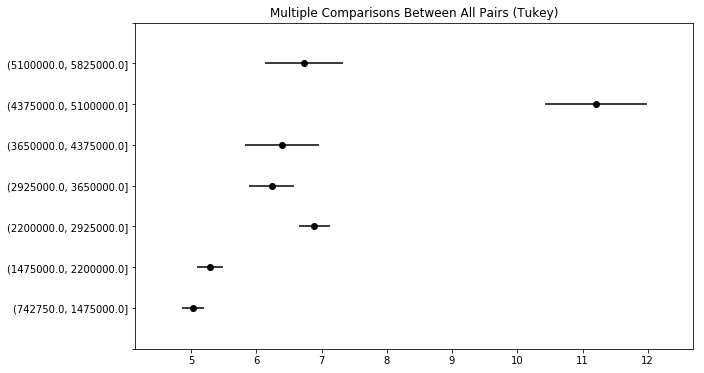

Exp_max
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.3668   0.0501  0.6835  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  2.0712   1.6816  2.4609  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  0.8046   0.2271  1.3821  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  2.002    1.1224  2.8816  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  7.6706   6.522   8.8191  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  2.8494   1.9281  3.7706  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  1.7044   1.2522  2.1567  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.4378  -0.1837  1.0593 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  1.6352   0.7261  2.5443  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  7.3038   

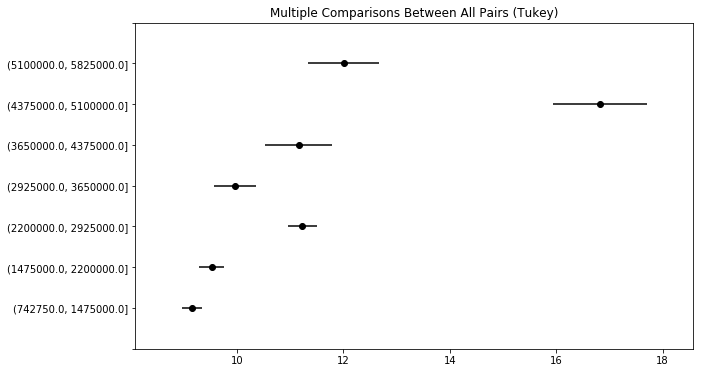

NCR
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.1356   0.0972  0.1739  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0306  -0.0778  0.0166 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  -0.049   -0.119  0.0209 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  -0.131  -0.2375 -0.0244  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.1514  -0.2905 -0.0123  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0492  -0.1608  0.0624 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.1662   -0.221 -0.1114  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.1846  -0.2599 -0.1093  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.2666  -0.3767 -0.1564  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  -0.287  -0.42

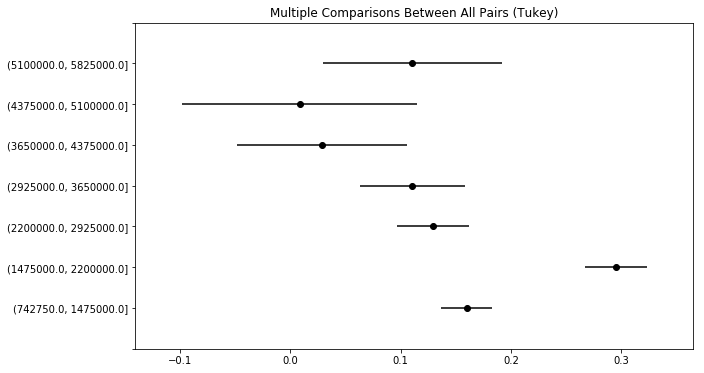

Hyd
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0579  -0.0928 -0.0231  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  0.0008  -0.0421  0.0437 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.1224   -0.186 -0.0589  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.1321  -0.2289 -0.0353  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0155   -0.142  0.1109 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0929  -0.1943  0.0085 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0588   0.009   0.1086  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0645  -0.1329  0.0039 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0742  -0.1742  0.0259 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.0424  -0.08

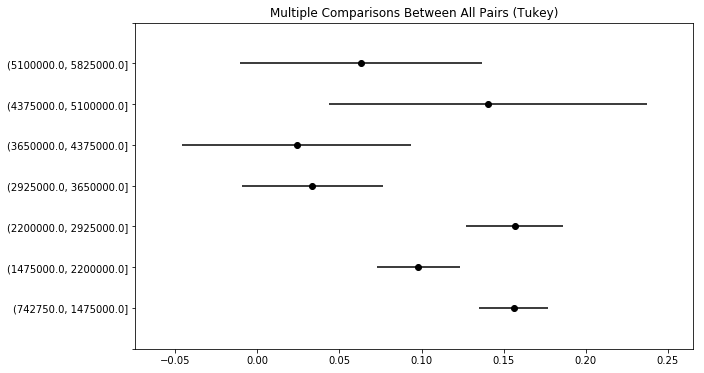

Pune
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.1331  -0.1641  -0.102  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.1255  -0.1637 -0.0872  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0814   -0.138 -0.0248  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.1565  -0.2427 -0.0703  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0739  -0.1864  0.0387 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.1565  -0.2468 -0.0662  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0076  -0.0367  0.052  False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.0517  -0.0093  0.1126 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0234  -0.1125  0.0657 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.0592  -0.0

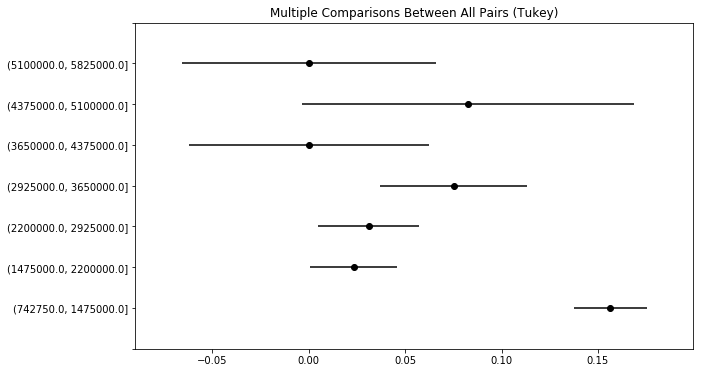

Mumbai
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  -0.032  -0.0668  0.0028 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.1205  -0.1633 -0.0777  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0828  -0.1462 -0.0193  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.1638  -0.2604 -0.0672  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  0.1916   0.0654  0.3178  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.1638   -0.265 -0.0626  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0885  -0.1382 -0.0388  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0507   -0.119  0.0175 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.1318  -0.2316 -0.0319  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.2236   0

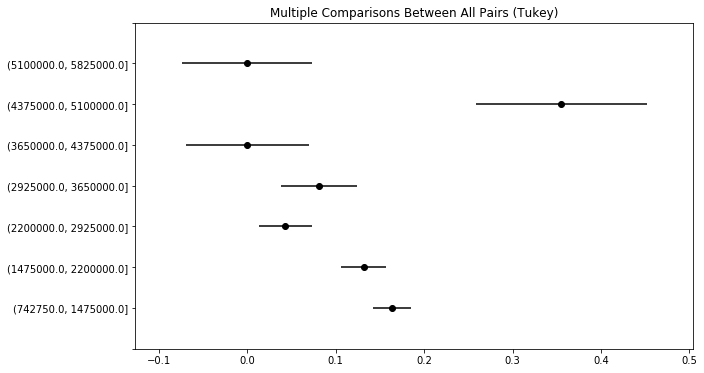

Bangalore
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.2371   0.192   0.2822  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  0.4132   0.3577  0.4688  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  0.6418   0.5594  0.7241  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  0.6368   0.5114  0.7622  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  0.3432   0.1794  0.5069  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  0.7248   0.5935  0.8561  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.1761   0.1117  0.2406  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.4047   0.3161  0.4933  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.3997   0.2701  0.5293  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.1061 

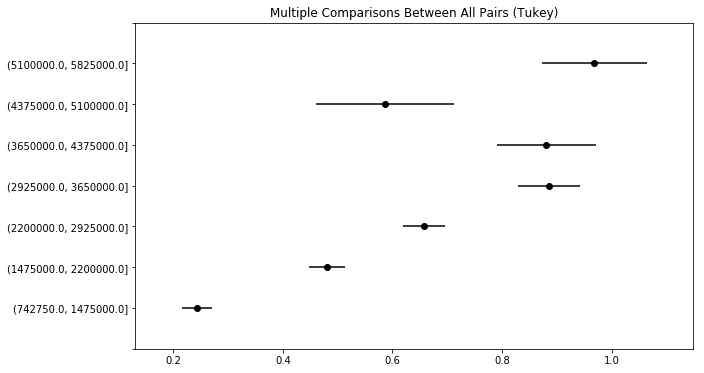

Chennai
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  -0.037  -0.0677 -0.0063  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.1046  -0.1423 -0.0668  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0868  -0.1427 -0.0308  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0708   -0.156  0.0143 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  -0.12   -0.2312 -0.0088  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0967  -0.1859 -0.0075  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0676  -0.1114 -0.0238  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0498  -0.1099  0.0104 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0338  -0.1219  0.0542 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  -0.083  -

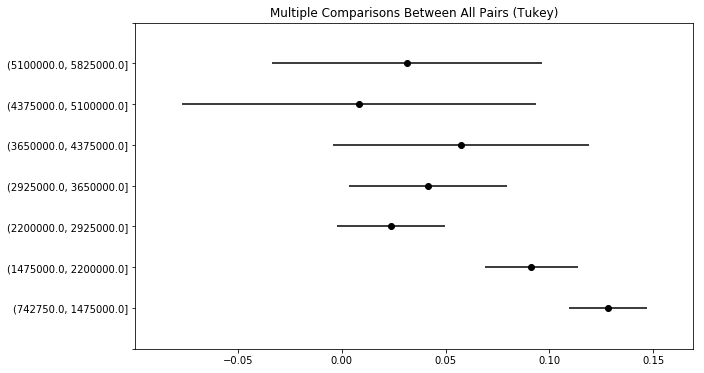

Ahmedabad
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0201  -0.0317 -0.0085  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0211  -0.0354 -0.0068  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0211  -0.0422   0.0   False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0211  -0.0533  0.0111 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0128  -0.0549  0.0292 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0211  -0.0548  0.0126 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  -0.001  -0.0175  0.0156 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  -0.001  -0.0237  0.0218 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  -0.001  -0.0342  0.0323 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.0073 

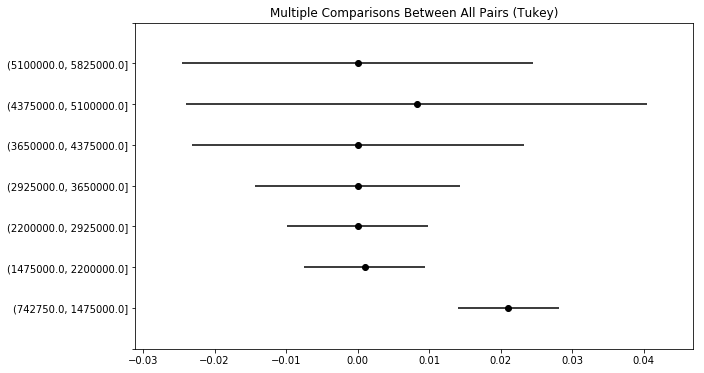

Kolkata
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0111  -0.0223   0.0   False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  -0.017  -0.0307 -0.0033  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  -0.017  -0.0373  0.0033 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0122  -0.0432  0.0188 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  0.0243  -0.0161  0.0648 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0117  -0.0442  0.0207 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0059  -0.0218  0.0101 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0059  -0.0277  0.016  False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0011  -0.0331  0.031  False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.0355  -

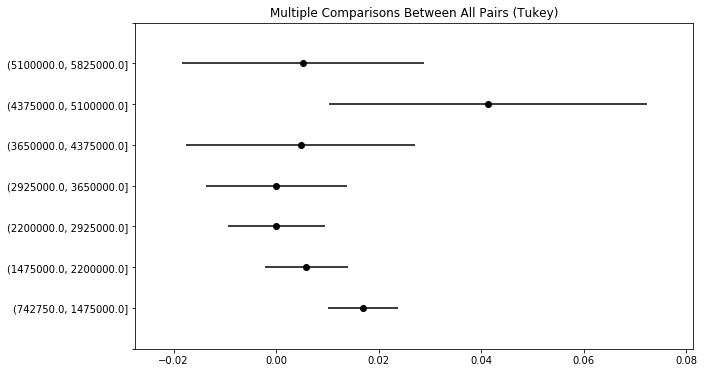

Kochi
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0121  -0.0209 -0.0034  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0113  -0.0221 -0.0005  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0121  -0.0282  0.0039 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0121  -0.0366  0.0123 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0121   -0.044  0.0197 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0121  -0.0377  0.0134 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0008  -0.0117  0.0134 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]   0.0    -0.0173  0.0173 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]   0.0    -0.0252  0.0252 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]   0.0    -0.

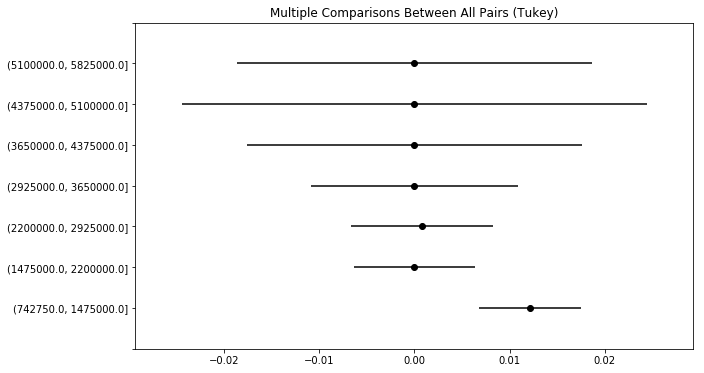

Hyderabad
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0579  -0.0928 -0.0231  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  0.0008  -0.0421  0.0437 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.1224   -0.186 -0.0589  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.1321  -0.2289 -0.0353  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0155   -0.142  0.1109 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0929  -0.1943  0.0085 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0588   0.009   0.1086  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0645  -0.1329  0.0039 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0742  -0.1742  0.0259 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.0424 

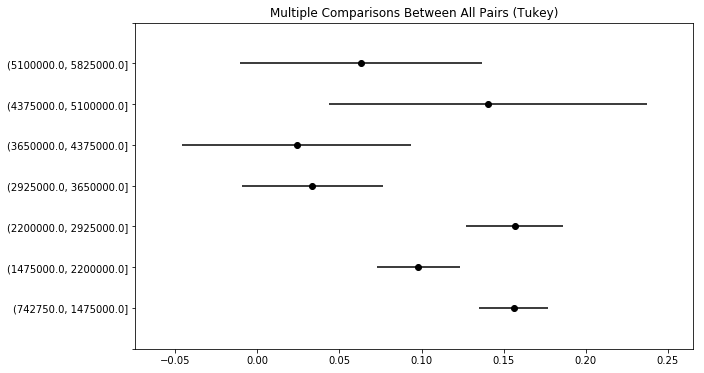

Jaipur
             Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower  upper  reject
----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0068  -0.0136  -0.0   True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0068  -0.0152 0.0015 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0029  -0.0153 0.0095 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0068  -0.0257 0.012  False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  0.0014  -0.0232 0.026  False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0068  -0.0266 0.0129 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]   0.0    -0.0097 0.0097 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.004   -0.0094 0.0173 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]   0.0    -0.0195 0.0195 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.0083  -0.0168 0.0334

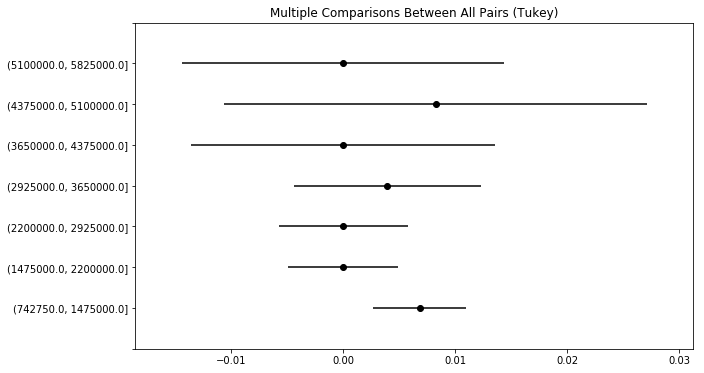

Trivandrum
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0079   -0.015 -0.0008  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0079  -0.0166  0.0008 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0079  -0.0208  0.005  False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0079  -0.0275  0.0117 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0079  -0.0335  0.0177 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0079  -0.0284  0.0126 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]   0.0    -0.0101  0.0101 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]   0.0    -0.0139  0.0139 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]   0.0    -0.0203  0.0203 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]   0.0  

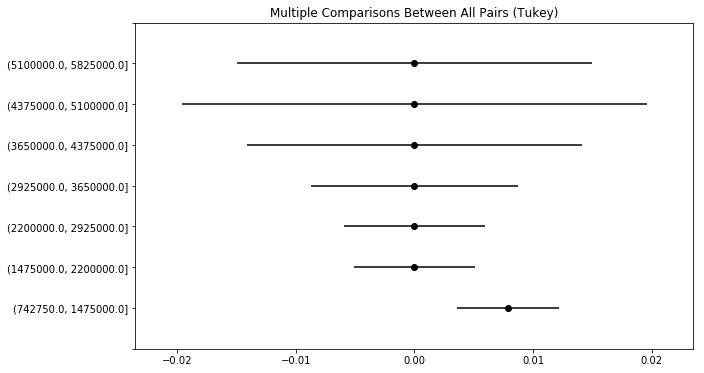

Indore
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0067  -0.0132 -0.0002  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0067  -0.0147  0.0013 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0067  -0.0185  0.0052 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0067  -0.0247  0.0114 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0067  -0.0302  0.0169 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0067  -0.0256  0.0122 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]   0.0    -0.0093  0.0093 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]   0.0    -0.0128  0.0128 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]   0.0    -0.0187  0.0187 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]   0.0     -

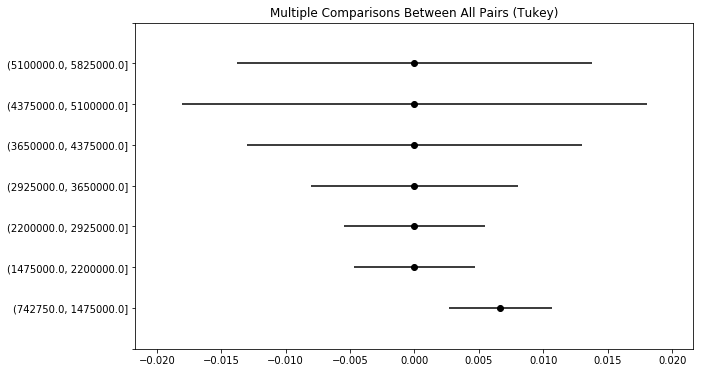

Coimbatore
             Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower  upper  reject
----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0062  -0.0128 0.0004 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0067  -0.0148 0.0014 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0067  -0.0187 0.0053 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0067  -0.0249 0.0116 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0067  -0.0305 0.0172 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0067  -0.0258 0.0124 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0005  -0.0099 0.0089 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0005  -0.0134 0.0124 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0005  -0.0194 0.0184 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.0005  -0.0248 0.

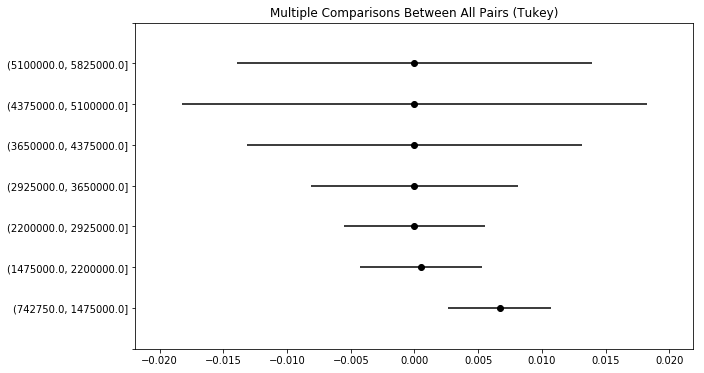

OthersLoc
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0573  -0.0793 -0.0353  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0736  -0.1007 -0.0464  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0744  -0.1146 -0.0342  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0026  -0.0638  0.0586 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0744  -0.1543  0.0056 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0744  -0.1385 -0.0103  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0163  -0.0477  0.0152 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0171  -0.0603  0.0262 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.0547  -0.0086  0.118  False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.0171 

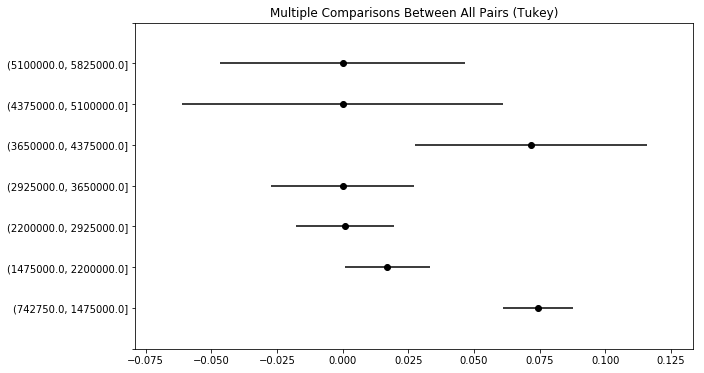

Dates_new
               Multiple Comparison of Means - Tukey HSD,FWER=0.00              
        group1                 group2         meandiff  lower    upper   reject
-------------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  4.0196   1.532    6.5073   True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -2.1173  -5.1784   0.9437  False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -6.9961  -11.5329 -2.4592   True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -19.8336 -26.7434 -12.9238  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  6.7549  -2.2674  15.7772  False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -16.4905 -23.7275 -9.2536   True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -6.1369  -9.6897  -2.5842   True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -11.0157 -15.8978 -6.1336   True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -23.8532 -30.9945 -16.7119  True 
(1475000.0, 2200000.0] (437500

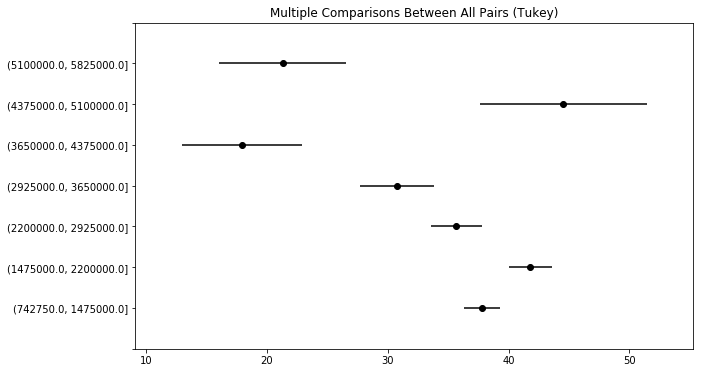

Title_Analyst
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0597   -0.079 -0.0405  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0558  -0.0795 -0.0321  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0607  -0.0958 -0.0256  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0607  -0.1142 -0.0072  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0607  -0.1305  0.0091 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0607  -0.1167 -0.0047  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0039  -0.0236  0.0314 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  -0.001  -0.0388  0.0368 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  -0.001  -0.0562  0.0543 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  -0.

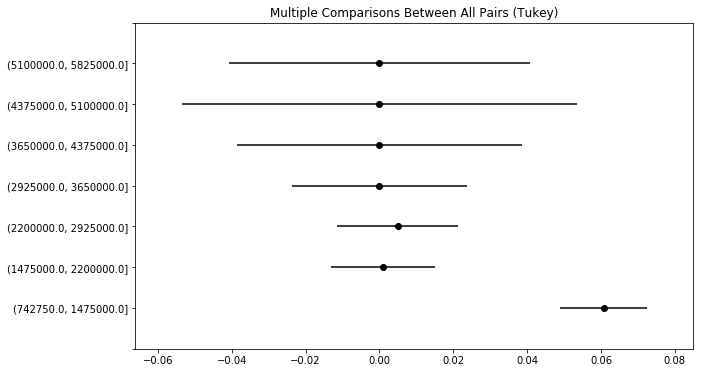

Title_Architect
             Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower  upper  reject
----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.0051  -0.0198 0.0301 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  0.0588   0.0282 0.0895  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  0.0518   0.0063 0.0972  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  0.0419  -0.0273 0.1111 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  0.4303   0.3399 0.5207  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  0.0668  -0.0057 0.1392 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0537   0.0181 0.0893  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.0466  -0.0023 0.0955 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.0367  -0.0348 0.1083 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.4252   0.33

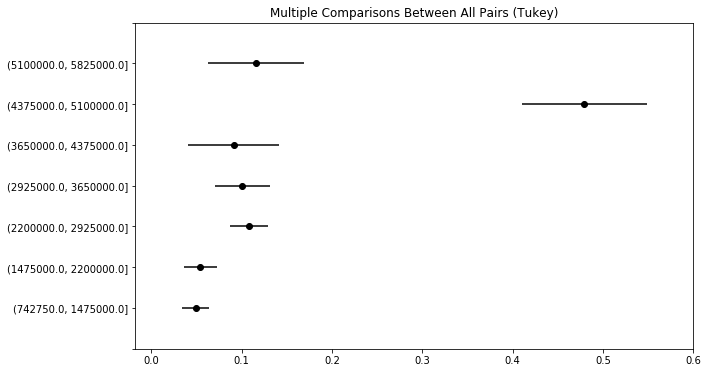

Title_Consultant
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0332  -0.0489 -0.0175  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0386  -0.0579 -0.0192  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0386  -0.0672 -0.0099  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0386  -0.0822  0.0051 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0386  -0.0955  0.0184 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0386  -0.0842  0.0071 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0054  -0.0278  0.0171 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0054  -0.0362  0.0254 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0054  -0.0504  0.0397 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -

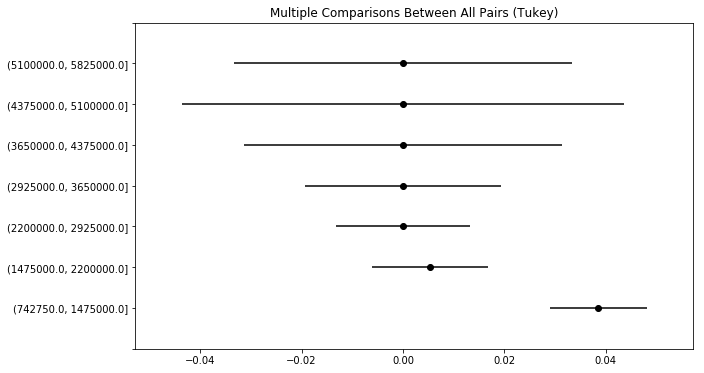

Title_Developer
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.1661  -0.2052  -0.127  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.2605  -0.3087 -0.2124  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.2769  -0.3482 -0.2055  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.2769  -0.3855 -0.1682  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.2686  -0.4105 -0.1267  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  0.0547  -0.0591  0.1685 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0944  -0.1503 -0.0386  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.1108  -0.1875  -0.034  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.1108  -0.2231  0.0015 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0

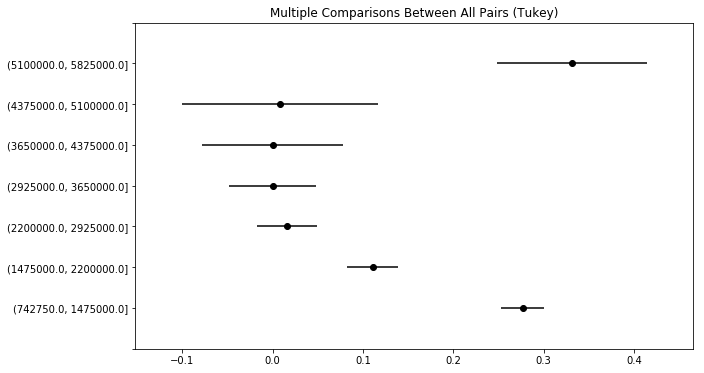

Title_Engineer
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.0904   0.0559  0.1249  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  0.0852   0.0427  0.1277  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  0.2157   0.1527  0.2787  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  0.3265   0.2306  0.4224  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  -0.078  -0.2033  0.0472 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  0.0212  -0.0792  0.1217 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0052  -0.0545  0.0441 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.1253   0.0575  0.1931  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.2361   0.137   0.3352  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.

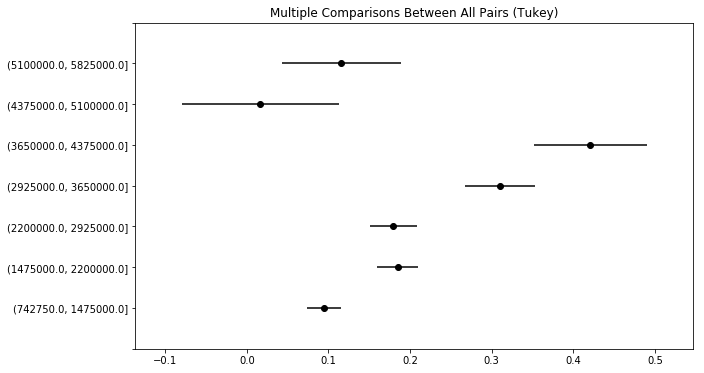

Title_Lead
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.095    0.0517  0.1383  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  0.1507   0.0974  0.204   True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  0.3299   0.2509  0.4089  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  -0.195  -0.3153 -0.0747  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0593  -0.2163  0.0978 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  0.1318   0.0058  0.2578  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0557  -0.0061  0.1176 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.2349   0.1499  0.3199  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  -0.29   -0.4143 -0.1657  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.1543

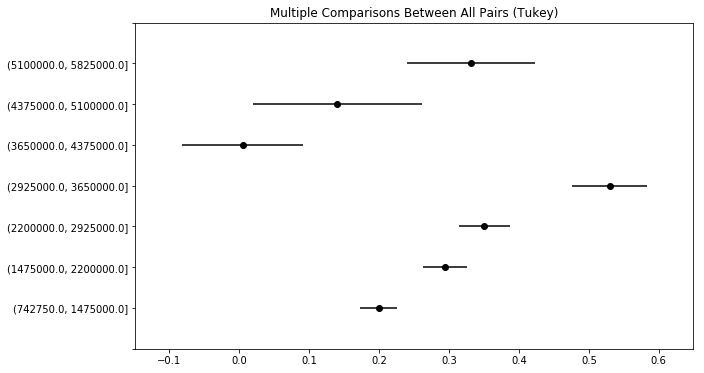

Title_Manager
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.0202  -0.0075  0.0479 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  0.0969   0.0628  0.131   True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0484  -0.0989  0.0021 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  0.0802   0.0032  0.1571  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0103  -0.1108  0.0902 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0682  -0.1488  0.0125 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0767   0.0371  0.1163  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0686   -0.123 -0.0142  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]   0.06   -0.0196  0.1395 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.0

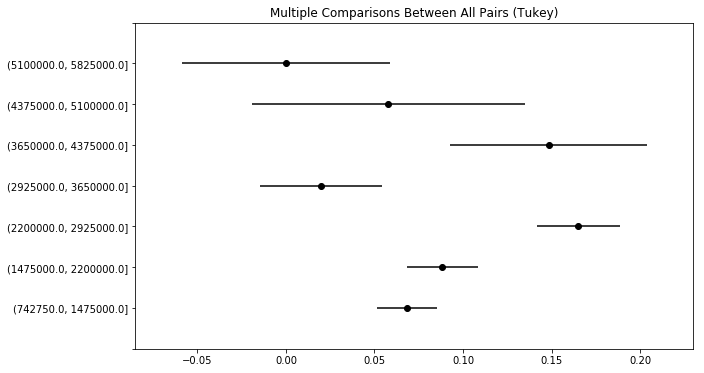

Title_Scientist
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.0239   0.0033  0.0444  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0196   -0.045  0.0057 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0282  -0.0657  0.0093 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  0.0317  -0.0254  0.0888 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  0.1335   0.0589  0.2081  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0401  -0.0999  0.0198 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0435  -0.0729 -0.0141  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0521  -0.0924 -0.0117  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.0078  -0.0512  0.0669 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0

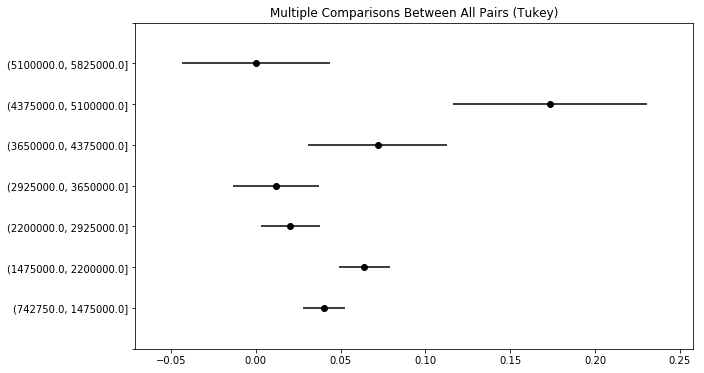

Exp_avg
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.3137   0.0219  0.6055  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  1.9654   1.6063  2.3245  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  1.005    0.4728  1.5372  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  1.6837   0.8731  2.4943  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  6.9227   5.8643  7.9812  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  2.2772   1.4283  3.1262  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  1.6517   1.2349  2.0685  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.6913   0.1186  1.264   True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]   1.37    0.5322  2.2078  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  6.609    

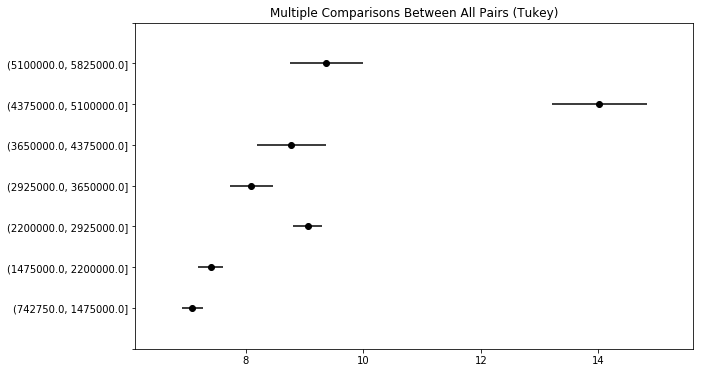

In [60]:
#For the sake of understanding, it should be mentioned that the last cut of (5100000.0, 5825000.0] includes
# the long tail of (5825000.0, 8000000.0]
import statsmodels.stats.multicomp as multi
Check=df_new.drop(['Company','Salary_min','Salary_max','Title_new','Skills_list','Predicted_Salary_inverse','Predicted_Salary'],axis=1)
for col in Check.columns:
    mc1=multi.MultiComparison(df_new[col],df_new['Predicted_Salary_inverse'])
    res1=mc1.tukeyhsd(alpha=0.001)
    print col
    print res1.summary()
    res1.plot_simultaneous()
    plt.show()

In [61]:
#Job Classifications- top 3 keywords associated with the job
#We will try to classify the titles and predict them for the generic roles.
df_roles=df_new[df_new['Title_new']!='Generic']
df_roles_pred=df_new[df_new['Title_new']=='Generic']

In [62]:
LE1=LabelEncoder()
df_roles.drop(['Company','Title_Architect','Title_Consultant','Title_Developer','Title_Engineer',\
               'Title_Lead','Title_Manager','Title_Scientist','Title_Analyst','Salary_min'\
              ,'Salary_max','Predicted_Salary_inverse'],axis=1,inplace=True)
df_roles_pred.drop(['Company','Title_Architect','Title_Consultant','Title_Developer','Title_Engineer',\
               'Title_Lead','Title_Manager','Title_Scientist','Title_Analyst','Salary_min'\
              ,'Salary_max','Predicted_Salary_inverse'],axis=1,inplace=True)
df_roles['Title']=LE1.fit_transform(df_roles['Title_new'])

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [66]:
# df_roles.drop('Title_new',axis=1,inplace=True)
weight=pd.DataFrame(1/df_roles['Title'].value_counts()*1000).to_dict()['Title']
df_roles.info()
train_X,test_X,train_Y,test_Y=train_test_split(df_roles.drop(['Title','Skills_list','Title_new'],axis=1),df_roles['Title'])
#since SVC worked really well for us earlier, lets start from there now
ss1=StandardScaler()
#Uncomment below
svc1=SVC(probability=True,class_weight=weight)
# params={'C':np.logspace(-3,0,5),'gamma':np.logspace(-3,0,5),'kernel':['rbf','sigmoid','linear']}
# svc_g1=GridSearchCV(svc1,params,cv=5,n_jobs=-1)
# svc_g1.fit(ss1.fit_transform(train_X),train_Y)
# svc1=svc_g1.best_estimator_
# print cross_val_score(svc1,ss1.transform(test_X),test_Y).mean()
# print cross_val_score(svc1,ss1.transform(test_X),test_Y).std()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9055 entries, 0 to 11007
Data columns (total 23 columns):
Title_new           9055 non-null object
Exp_min             9055 non-null int64
Exp_max             9055 non-null int64
NCR                 9055 non-null int64
Hyd                 9055 non-null int64
Pune                9055 non-null int64
Mumbai              9055 non-null int64
Bangalore           9055 non-null int64
Chennai             9055 non-null int64
Ahmedabad           9055 non-null int64
Kolkata             9055 non-null int64
Kochi               9055 non-null int64
Hyderabad           9055 non-null int64
Jaipur              9055 non-null int64
Trivandrum          9055 non-null int64
Indore              9055 non-null int64
Coimbatore          9055 non-null int64
OthersLoc           9055 non-null float64
Skills_list         9055 non-null object
Dates_new           9055 non-null int64
Exp_avg             9055 non-null float64
Predicted_Salary    9055 non-null int64
Title 

In [67]:
# f=open('svc1_project4','wb')
# pickle.dump(svc1,f)
# f.close()

In [64]:
f=open('svc1_project4','rb')
svc1=pickle.load(f)
f.close()

In [68]:
#Establishing baseline
df_roles['Title'].value_counts()/df_roles['Title'].shape[0]
#The accuracy is lower than our baseline so lets move on and try some other model here.

5    0.297957
3    0.235781
4    0.164660
6    0.097184
1    0.079072
7    0.051022
0    0.045058
2    0.029266
Name: Title, dtype: float64

In [69]:
#Lets try the Decision Tree Classification to see if we can get a better accuracy score
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(class_weight=weight)
params={'max_depth':range(1,25,1)}
svc_g2=GridSearchCV(dc,params,cv=5,n_jobs=-1)
svc_g2.fit(train_X,train_Y)
dc=svc_g2.best_estimator_
print cross_val_score(dc,test_X,test_Y).mean()
print cross_val_score(dc,test_X,test_Y).std()

0.404136899854
0.010204922046


In [70]:
#This is still not good enough!
#Lets try the RandomForest approach
from sklearn.ensemble import RandomForestClassifier
rdc=RandomForestClassifier(class_weight=weight)
params={'max_depth':range(1,25,1)}
svc_g3=GridSearchCV(rdc,params,cv=5,n_jobs=-1)
svc_g3.fit(train_X,train_Y)
rdc=svc_g3.best_estimator_
print cross_val_score(rdc,test_X,test_Y).mean()
print cross_val_score(rdc,test_X,test_Y).std()

0.432816594463
0.0127237785275


In [71]:
#Again this model is not as good as expected
#Lets try for a simpler logistic regression approach
logreg1=LogisticRegressionCV(Cs=1000,class_weight=weight)


logreg1.fit(ss1.fit_transform(train_X),train_Y)

print cross_val_score(logreg1,ss1.transform(test_X),test_Y).mean()
print cross_val_score(logreg1,ss1.transform(test_X),test_Y).std()

0.15838389997
0.0532006084256


In [72]:
#All the models so far are performing no better than random guessing
#Lets try AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(ss1.fit_transform(train_X),train_Y)
print cross_val_score(ABC,ss1.transform(test_X),test_Y).mean()
print cross_val_score(ABC,ss1.transform(test_X),test_Y).std()

0.224308425495
0.0254856805265


In [73]:
#Trying adaboost on Normalised data!
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
pip=make_pipeline(Normalizer,AdaBoostClassifier)
ada=AdaBoostClassifier().fit(Normalizer().fit_transform(train_X),train_Y)

In [74]:
print cross_val_score(ada,Normalizer().fit_transform(test_X),test_Y).mean()

0.246019695221


In [75]:
df_roles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9055 entries, 0 to 11007
Data columns (total 23 columns):
Title_new           9055 non-null object
Exp_min             9055 non-null int64
Exp_max             9055 non-null int64
NCR                 9055 non-null int64
Hyd                 9055 non-null int64
Pune                9055 non-null int64
Mumbai              9055 non-null int64
Bangalore           9055 non-null int64
Chennai             9055 non-null int64
Ahmedabad           9055 non-null int64
Kolkata             9055 non-null int64
Kochi               9055 non-null int64
Hyderabad           9055 non-null int64
Jaipur              9055 non-null int64
Trivandrum          9055 non-null int64
Indore              9055 non-null int64
Coimbatore          9055 non-null int64
OthersLoc           9055 non-null float64
Skills_list         9055 non-null object
Dates_new           9055 non-null int64
Exp_avg             9055 non-null float64
Predicted_Salary    9055 non-null int64
Title 

In [77]:
#As we can see, there does not seem to be any clear division between the classes.
#Lets move to unsupervised learning to see if we can find any pattern in the clusters.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
score=[]
for i in range(2,25,1):
    km=KMeans(i)
    km.fit(StandardScaler().fit_transform(df_roles[['Title','Exp_avg','Predicted_Salary']]))
    score.append(silhouette_score(StandardScaler().fit_transform(df_roles[['Title','Exp_avg','Predicted_Salary']]),km.labels_))


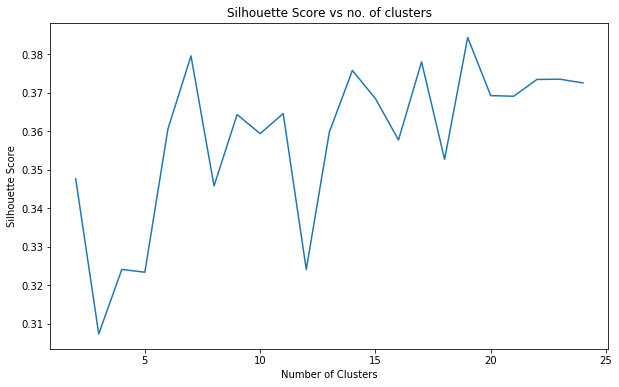

In [78]:
_=plt.figure(figsize=(10,6))
_=plt.plot(range(2,25,1),score)
_=plt.title('Silhouette Score vs no. of clusters')
_=plt.ylabel("Silhouette Score")
_=plt.xlabel("Number of Clusters")
plt.show()

In [82]:
#This just validates our theory the groups have been divided based on the city base
#One group is that of bigger cities while the other is for the smaller cities
#Lets also test for the major key words in both these groups to test whether the skills required are 
#significantly different in both these clusters
#Creating master list for skills in label 1 and 0
list1=[]
list0=[]

for x in df_roles[df_roles['Labels']==1]['Skills_list']:
    list1+=x
for x in df_roles[df_roles['Labels']==0]['Skills_list']:
    list0+=x
from collections import Counter
labels1, values1 = zip(*Counter(list1).items())
labels0, values0 = zip(*Counter(list0).items())
sum1=float(np.sum(values1))
sum2=float(np.sum(values0))
pd1=pd.DataFrame([labels1,values1],index=['Label','Values']).T.sort_values('Values',ascending=False)
pd1=pd1.drop(0)
pd1['Values_per']=pd1['Values']/(sum1)*100
print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
pd0=pd.DataFrame([labels0,values0],index=['Label','Values']).T.sort_values('Values',ascending=False)
pd0=pd0.drop(0)
pd0['Values_per']=pd0['Values']/(sum2)*100
print pd0.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)

            Label Values_per
4980       Python    2.69888
145           SQL    2.63364
5506        MySQL    2.02688
3323         HTML    1.84855
4229   Algorithms    1.29181
4376   Javascript    1.25266
3339       Oracle    1.21787
2769          SQL    1.15915
2552         Java    1.02649
3880            C    1.00909
            Label Values_per
320           SQL     2.7084
1753       Python    2.42504
184          HTML    1.69357
1093       Oracle    1.38386
2914        MySQL    1.14003
121    Algorithms    1.14003
2982         Java    1.12685
1511          PMP    0.92257
334     Six Sigma   0.902801
2935          SQL   0.896211


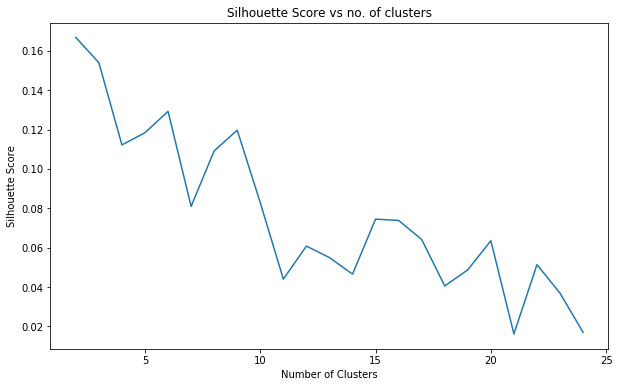

In [80]:
#Because k-mean has a tendency to be highly influenced by the outliers, we will do a normalisation(across the row)
# to ensure that the outliers fit inside.
# This influence can be most easily seen with respect to 7 clusters which are likely based on the number of salary groups
#Lets see how this performs
score=[]
for i in range(2,25,1):
    km=KMeans(i)
    km.fit(StandardScaler().fit_transform(df_roles[['Title','Exp_avg','Predicted_Salary']]))
    score.append(silhouette_score(Normalizer().fit_transform(df_roles[['Title','Exp_avg','Predicted_Salary']]),km.labels_))
_=plt.figure(figsize=(10,6))
_=plt.plot(range(2,25,1),score)
_=plt.title('Silhouette Score vs no. of clusters')
_=plt.ylabel("Silhouette Score")
_=plt.xlabel("Number of Clusters")
plt.show()

In [82]:
#It shows a decent result with n=6 clusters. Lets see what kind of clusters we get here
km2=KMeans(6)
km2.fit(Normalizer().fit_transform(df_roles.drop(['Title','Skills_list','Title_new','Dates_new'],axis=1)))
df_roles['Labels6']=km2.labels_

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [83]:
#Create a new dataframe for all the non-generic roles
df_roles1=df_new[df_new['Title_new']!='Generic']
df_roles1.drop(['Company','Salary_min','Salary_max','Predicted_Salary_inverse'],axis=1,inplace=True)
df_roles1['Labels6']=df_roles['Labels6']

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Exp_min
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -2.8457  -3.4295 -2.2619  True 
  0      2     2.6217   2.353   2.8904  True 
  0      3     5.6082   5.3664   5.85   True 
  0      4     2.5065   2.278   2.7351  True 
  0      5     1.3768   1.0467  1.7069  True 
  1      2     5.4674   4.8734  6.0614  True 
  1      3     8.4539   7.8716  9.0362  True 
  1      4     5.3522   4.7753  5.9291  True 
  1      5     4.2225   3.5983  4.8466  True 
  2      3     2.9865   2.7211  3.2518  True 
  2      4    -0.1152  -0.3685  0.1382 False 
  2      5    -1.2449  -1.5926 -0.8972  True 
  3      4    -3.1016  -3.3263  -2.877  True 
  3      5    -4.2314  -4.5587  -3.904  True 
  4      5    -1.1297  -1.4474  -0.812  True 
---------------------------------------------


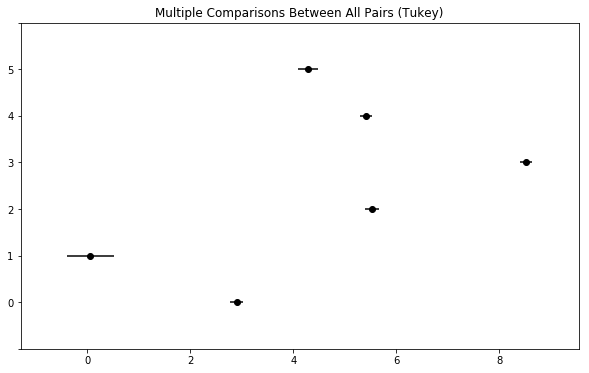

Exp_max
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -2.6307  -3.4755  -1.786  True 
  0      2     2.1167   1.728   2.5055  True 
  0      3     4.2309   3.881   4.5807  True 
  0      4     2.1612   1.8305  2.4919  True 
  0      5     1.0109   0.5334  1.4885  True 
  1      2     4.7475   3.888   5.6069  True 
  1      3     6.8616   6.0191  7.7041  True 
  1      4     4.7919   3.9571  5.6266  True 
  1      5     3.6416   2.7386  4.5447  True 
  2      3     2.1142   1.7302  2.4981  True 
  2      4     0.0444  -0.3222  0.411  False 
  2      5    -1.1058  -1.6089 -0.6027  True 
  3      4    -2.0697  -2.3947 -1.7447  True 
  3      5     -3.22   -3.6936 -2.7463  True 
  4      5    -1.1502  -1.6099 -0.6906  True 
---------------------------------------------


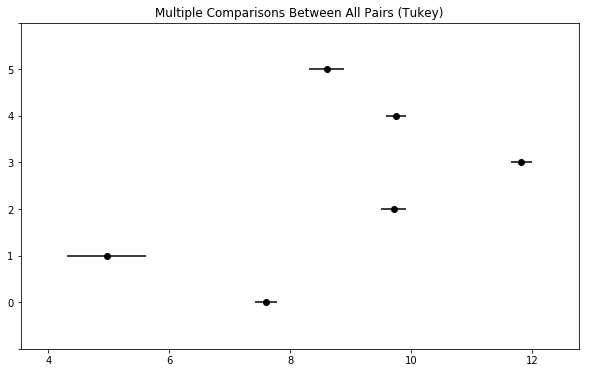

NCR
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.2606   0.1488  0.3724  True 
  0      2    -0.0821  -0.1335 -0.0306  True 
  0      3     -0.06   -0.1063 -0.0137  True 
  0      4     0.0049  -0.0388  0.0487 False 
  0      5    -0.1558   -0.219 -0.0926  True 
  1      2    -0.3427  -0.4564  -0.229  True 
  1      3    -0.3206  -0.4321 -0.2091  True 
  1      4    -0.2557  -0.3661 -0.1452  True 
  1      5    -0.4164  -0.5359 -0.2969  True 
  2      3     0.0221  -0.0287  0.0729 False 
  2      4     0.087    0.0385  0.1355  True 
  2      5    -0.0737  -0.1403 -0.0071  True 
  3      4     0.0649   0.0219  0.1079  True 
  3      5    -0.0959  -0.1585 -0.0332  True 
  4      5    -0.1608  -0.2216 -0.0999  True 
---------------------------------------------


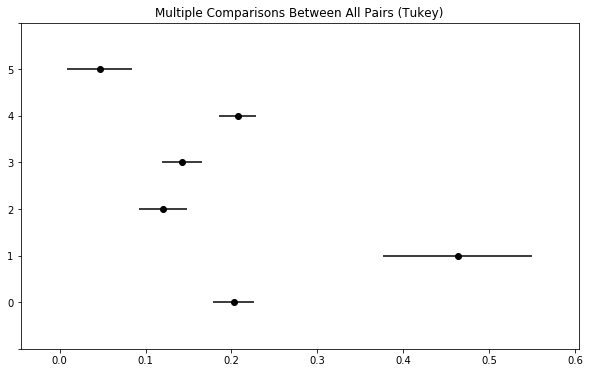

Hyd
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.5448   0.4818  0.6078  True 
  0      2     0.0367   0.0076  0.0657  True 
  0      3     0.1367   0.1106  0.1628  True 
  0      4     0.0124  -0.0122  0.0371 False 
  0      5     0.9974   0.9618  1.0331  True 
  1      2    -0.5082  -0.5723  -0.444  True 
  1      3    -0.4081   -0.471 -0.3453  True 
  1      4    -0.5324  -0.5947 -0.4701  True 
  1      5     0.4526   0.3853   0.52   True 
  2      3      0.1     0.0714  0.1287  True 
  2      4    -0.0242  -0.0516  0.0031 False 
  2      5     0.9608   0.9233  0.9983  True 
  3      4    -0.1242  -0.1485   -0.1   True 
  3      5     0.8608   0.8254  0.8961  True 
  4      5     0.985    0.9507  1.0193  True 
---------------------------------------------


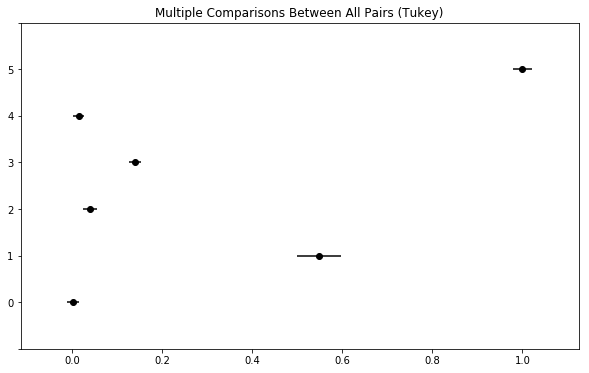

Pune
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.3983   0.3073  0.4893  True 
  0      2    -0.0665  -0.1084 -0.0246  True 
  0      3     0.0222  -0.0156  0.0599 False 
  0      4     0.0305  -0.0051  0.0662 False 
  0      5    -0.0257  -0.0771  0.0258 False 
  1      2    -0.4648  -0.5574 -0.3722  True 
  1      3    -0.3762   -0.467 -0.2854  True 
  1      4    -0.3678  -0.4577 -0.2778  True 
  1      5     -0.424  -0.5213 -0.3267  True 
  2      3     0.0886   0.0473   0.13   True 
  2      4     0.097    0.0575  0.1365  True 
  2      5     0.0408  -0.0134  0.095  False 
  3      4     0.0084  -0.0266  0.0434 False 
  3      5    -0.0478  -0.0989  0.0032 False 
  4      5    -0.0562  -0.1057 -0.0067  True 
---------------------------------------------


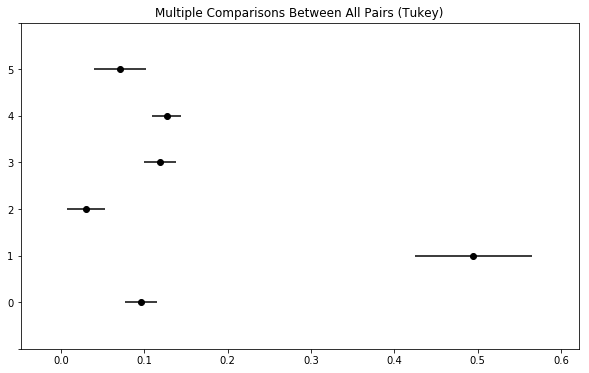

Mumbai
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.285    0.183   0.3869  True 
  0      2    -0.1208  -0.1677 -0.0739  True 
  0      3    -0.0246  -0.0669  0.0176 False 
  0      4     0.0327  -0.0072  0.0727 False 
  0      5    -0.1224  -0.1801 -0.0648  True 
  1      2    -0.4058  -0.5095  -0.302  True 
  1      3    -0.3096  -0.4113 -0.2079  True 
  1      4    -0.2522   -0.353 -0.1515  True 
  1      5    -0.4074  -0.5164 -0.2984  True 
  2      3     0.0962   0.0498  0.1425  True 
  2      4     0.1535   0.1093  0.1978  True 
  2      5    -0.0016  -0.0624  0.0591 False 
  3      4     0.0574   0.0182  0.0966  True 
  3      5    -0.0978   -0.155 -0.0406  True 
  4      5    -0.1552  -0.2107 -0.0997  True 
---------------------------------------------


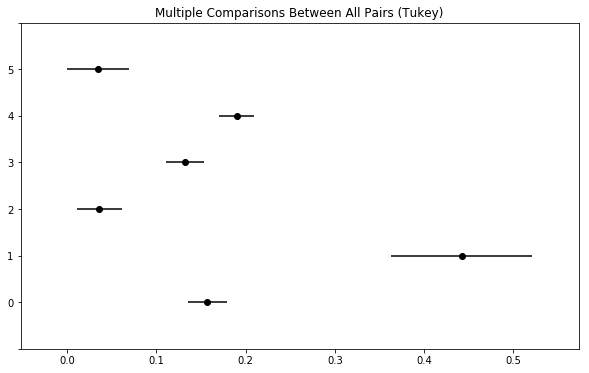

Bangalore
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.2213   0.0864  0.3563  True 
  0      2     0.5165   0.4543  0.5786  True 
  0      3     0.0537  -0.0022  0.1096 False 
  0      4    -0.0226  -0.0755  0.0302 False 
  0      5    -0.1898  -0.2661 -0.1135  True 
  1      2     0.2951   0.1578  0.4324  True 
  1      3    -0.1676  -0.3022  -0.033  True 
  1      4     -0.244  -0.3774 -0.1106  True 
  1      5    -0.4112  -0.5555 -0.2669  True 
  2      3    -0.4627  -0.5241 -0.4014  True 
  2      4    -0.5391  -0.5977 -0.4805  True 
  2      5    -0.7063  -0.7867 -0.6259  True 
  3      4    -0.0764  -0.1283 -0.0244  True 
  3      5    -0.2436  -0.3192 -0.1679  True 
  4      5    -0.1672  -0.2406 -0.0937  True 
---------------------------------------------


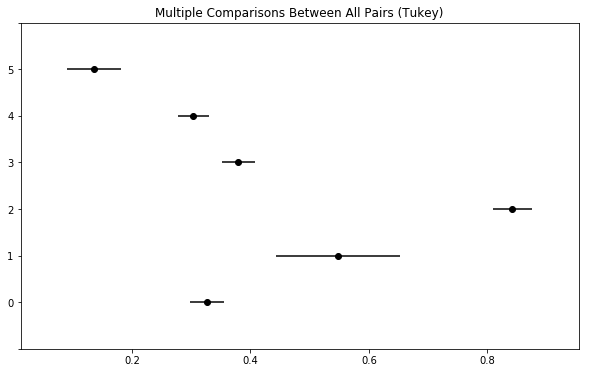

Chennai
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.2958   0.2076  0.3839  True 
  0      2    -0.0733  -0.1139 -0.0328  True 
  0      3     0.0038  -0.0327  0.0403 False 
  0      4     0.0186  -0.0159  0.0531 False 
  0      5    -0.0336  -0.0834  0.0163 False 
  1      2    -0.3691  -0.4587 -0.2794  True 
  1      3     -0.292  -0.3799 -0.2041  True 
  1      4    -0.2771  -0.3642 -0.1901  True 
  1      5    -0.3293  -0.4235 -0.2351  True 
  2      3     0.0771   0.037   0.1171  True 
  2      4     0.0919   0.0537  0.1302  True 
  2      5     0.0398  -0.0127  0.0922 False 
  3      4     0.0149   -0.019  0.0488 False 
  3      5    -0.0373  -0.0867  0.0121 False 
  4      5    -0.0522  -0.1001 -0.0042  True 
---------------------------------------------


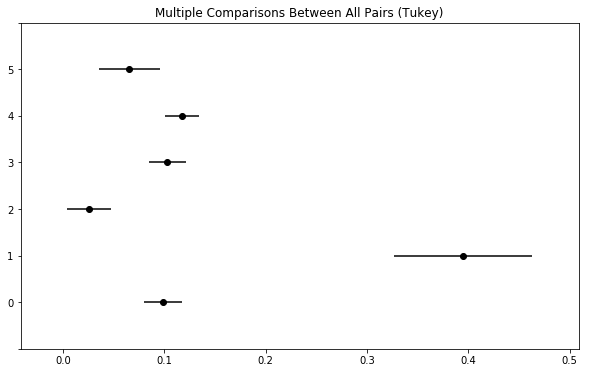

Ahmedabad
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.0301  -0.0639  0.0037 False 
  0      2    -0.0301  -0.0457 -0.0145  True 
  0      3     -0.02    -0.034  -0.006  True 
  0      4    -0.0177   -0.031 -0.0045  True 
  0      5    -0.0261  -0.0452  -0.007  True 
  1      2      0.0    -0.0344  0.0344 False 
  1      3     0.0101  -0.0237  0.0438 False 
  1      4     0.0124  -0.0211  0.0458 False 
  1      5     0.004   -0.0322  0.0402 False 
  2      3     0.0101  -0.0053  0.0255 False 
  2      4     0.0124  -0.0023  0.027  False 
  2      5     0.004   -0.0161  0.0242 False 
  3      4     0.0023  -0.0107  0.0153 False 
  3      5    -0.0061  -0.0251  0.0129 False 
  4      5    -0.0084  -0.0268  0.0101 False 
---------------------------------------------


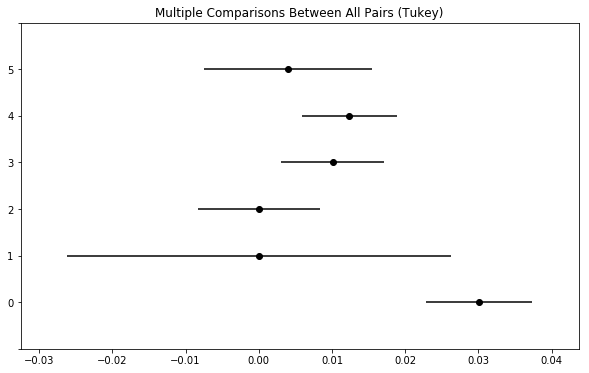

Kolkata
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -0.0179  -0.0509 0.0152 False 
  0      2    -0.0136  -0.0288 0.0016 False 
  0      3    -0.0063   -0.02  0.0074 False 
  0      4     -0.004  -0.0169 0.0089 False 
  0      5    -0.0072  -0.0259 0.0115 False 
  1      2     0.0043  -0.0294 0.0379 False 
  1      3     0.0115  -0.0215 0.0445 False 
  1      4     0.0139  -0.0188 0.0465 False 
  1      5     0.0107  -0.0247 0.046  False 
  2      3     0.0072  -0.0078 0.0223 False 
  2      4     0.0096  -0.0048 0.0239 False 
  2      5     0.0064  -0.0133 0.0261 False 
  3      4     0.0023  -0.0104 0.0151 False 
  3      5    -0.0008  -0.0194 0.0177 False 
  4      5    -0.0032  -0.0212 0.0148 False 
--------------------------------------------


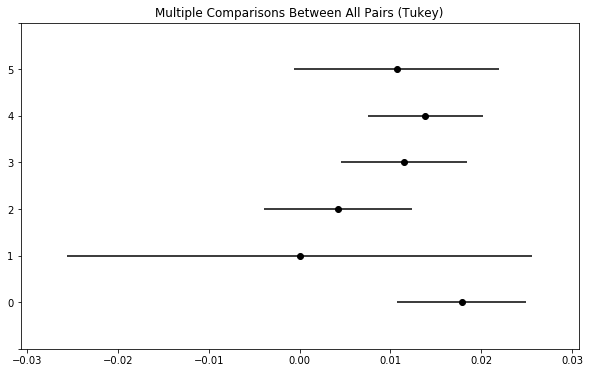

Kochi
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.0122  -0.0381  0.0136 False 
  0      2    -0.0122  -0.0241 -0.0003  True 
  0      3    -0.0026  -0.0134  0.0081 False 
  0      4     -0.004  -0.0141  0.0061 False 
  0      5    -0.0109  -0.0255  0.0037 False 
  1      2      0.0    -0.0263  0.0263 False 
  1      3     0.0096  -0.0162  0.0354 False 
  1      4     0.0082  -0.0173  0.0338 False 
  1      5     0.0013  -0.0263  0.029  False 
  2      3     0.0096  -0.0022  0.0214 False 
  2      4     0.0082   -0.003  0.0195 False 
  2      5     0.0013  -0.0141  0.0167 False 
  3      4    -0.0014  -0.0113  0.0086 False 
  3      5    -0.0083  -0.0228  0.0062 False 
  4      5    -0.0069   -0.021  0.0072 False 
---------------------------------------------


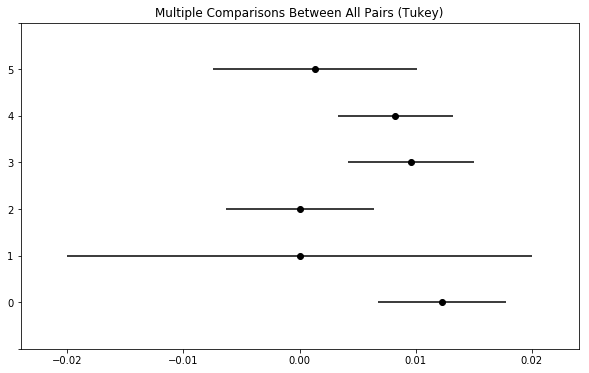

Hyderabad
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.5448   0.4818  0.6078  True 
  0      2     0.0367   0.0076  0.0657  True 
  0      3     0.1367   0.1106  0.1628  True 
  0      4     0.0124  -0.0122  0.0371 False 
  0      5     0.9974   0.9618  1.0331  True 
  1      2    -0.5082  -0.5723  -0.444  True 
  1      3    -0.4081   -0.471 -0.3453  True 
  1      4    -0.5324  -0.5947 -0.4701  True 
  1      5     0.4526   0.3853   0.52   True 
  2      3      0.1     0.0714  0.1287  True 
  2      4    -0.0242  -0.0516  0.0031 False 
  2      5     0.9608   0.9233  0.9983  True 
  3      4    -0.1242  -0.1485   -0.1   True 
  3      5     0.8608   0.8254  0.8961  True 
  4      5     0.985    0.9507  1.0193  True 
---------------------------------------------


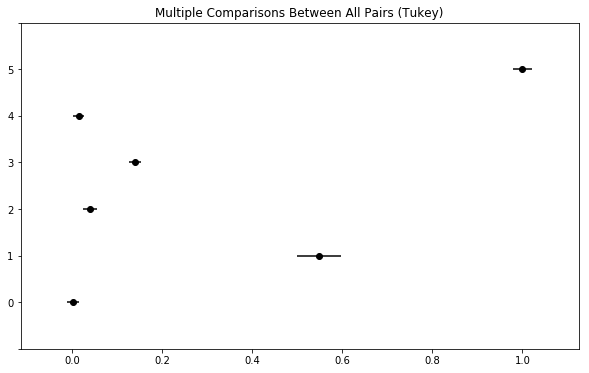

Jaipur
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -0.0097  -0.0307 0.0113 False 
  0      2     -0.009  -0.0186 0.0007 False 
  0      3    -0.0078  -0.0165 0.0009 False 
  0      4    -0.0022  -0.0104 0.006  False 
  0      5    -0.0097  -0.0216 0.0022 False 
  1      2     0.0007  -0.0206 0.0221 False 
  1      3     0.0019   -0.019 0.0228 False 
  1      4     0.0075  -0.0132 0.0282 False 
  1      5      0.0    -0.0224 0.0224 False 
  2      3     0.0012  -0.0083 0.0107 False 
  2      4     0.0068  -0.0023 0.0159 False 
  2      5    -0.0007  -0.0132 0.0118 False 
  3      4     0.0056  -0.0025 0.0136 False 
  3      5    -0.0019  -0.0137 0.0098 False 
  4      5    -0.0075  -0.0189 0.0039 False 
--------------------------------------------


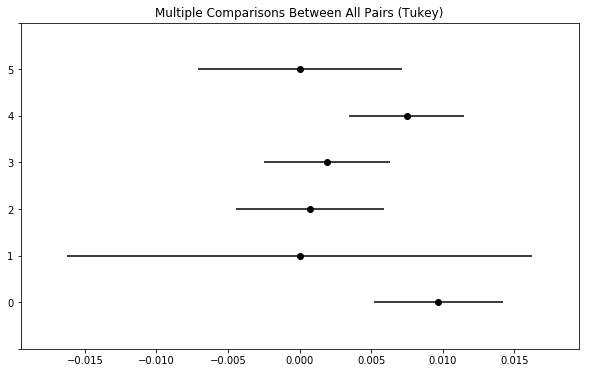

Trivandrum
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -0.0066  -0.0279 0.0146 False 
  0      2    -0.0066  -0.0164 0.0031 False 
  0      3    -0.0028  -0.0116 0.006  False 
  0      4     0.0009  -0.0075 0.0092 False 
  0      5    -0.0013  -0.0133 0.0107 False 
  1      2      0.0    -0.0216 0.0216 False 
  1      3     0.0038  -0.0173 0.025  False 
  1      4     0.0075  -0.0135 0.0285 False 
  1      5     0.0053  -0.0174 0.028  False 
  2      3     0.0038  -0.0058 0.0135 False 
  2      4     0.0075  -0.0017 0.0167 False 
  2      5     0.0053  -0.0073 0.018  False 
  3      4     0.0037  -0.0045 0.0118 False 
  3      5     0.0015  -0.0104 0.0134 False 
  4      5    -0.0022  -0.0137 0.0094 False 
--------------------------------------------


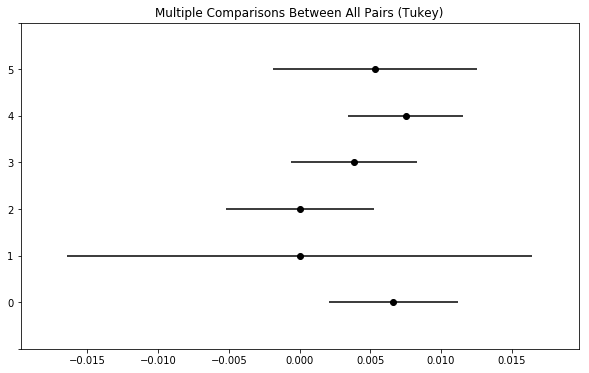

Indore
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.0097  -0.0297  0.0103 False 
  0      2    -0.0097  -0.0189 -0.0005  True 
  0      3    -0.0049  -0.0132  0.0034 False 
  0      4    -0.0056  -0.0134  0.0023 False 
  0      5    -0.0097   -0.021  0.0016 False 
  1      2      0.0    -0.0204  0.0204 False 
  1      3     0.0048  -0.0152  0.0248 False 
  1      4     0.0041  -0.0157  0.0239 False 
  1      5      0.0    -0.0214  0.0214 False 
  2      3     0.0048  -0.0043  0.0139 False 
  2      4     0.0041  -0.0046  0.0128 False 
  2      5      0.0    -0.0119  0.0119 False 
  3      4    -0.0007  -0.0084  0.007  False 
  3      5    -0.0048   -0.016  0.0064 False 
  4      5    -0.0041   -0.015  0.0068 False 
---------------------------------------------


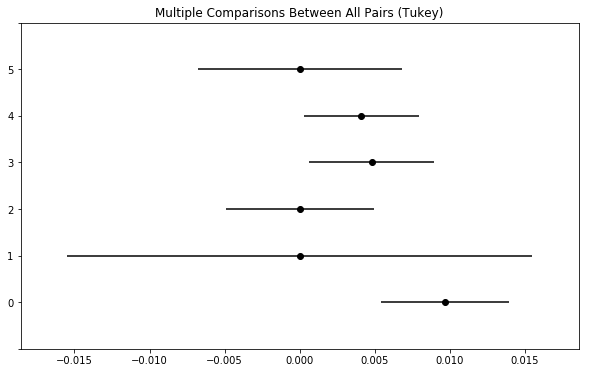

Coimbatore
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.0122  -0.0325  0.008  False 
  0      2    -0.0122  -0.0216 -0.0029  True 
  0      3    -0.0108  -0.0192 -0.0024  True 
  0      4     -0.007  -0.0149  0.0009 False 
  0      5    -0.0122  -0.0237 -0.0008  True 
  1      2      0.0    -0.0206  0.0206 False 
  1      3     0.0014  -0.0187  0.0216 False 
  1      4     0.0052  -0.0148  0.0252 False 
  1      5      0.0    -0.0216  0.0216 False 
  2      3     0.0014  -0.0078  0.0106 False 
  2      4     0.0052  -0.0035  0.014  False 
  2      5      0.0    -0.0121  0.0121 False 
  3      4     0.0038   -0.004  0.0116 False 
  3      5    -0.0014  -0.0128  0.0099 False 
  4      5    -0.0052  -0.0163  0.0058 False 
---------------------------------------------


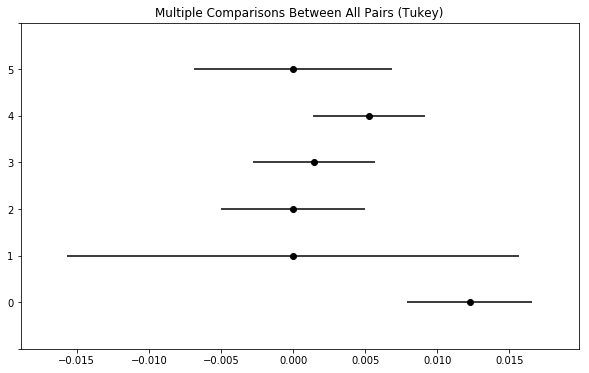

OthersLoc
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.0718  -0.1359 -0.0077  True 
  0      2    -0.0713  -0.1008 -0.0418  True 
  0      3    -0.0386  -0.0652 -0.0121  True 
  0      4    -0.0033  -0.0284  0.0218 False 
  0      5     -0.077  -0.1133 -0.0408  True 
  1      2     0.0004  -0.0648  0.0657 False 
  1      3     0.0331  -0.0308  0.0971 False 
  1      4     0.0685   0.0052  0.1319  True 
  1      5    -0.0053  -0.0738  0.0633 False 
  2      3     0.0327   0.0036  0.0618  True 
  2      4     0.0681   0.0403  0.0959  True 
  2      5    -0.0057  -0.0439  0.0325 False 
  3      4     0.0354   0.0107   0.06   True 
  3      5    -0.0384  -0.0744 -0.0025  True 
  4      5    -0.0738  -0.1087 -0.0389  True 
---------------------------------------------


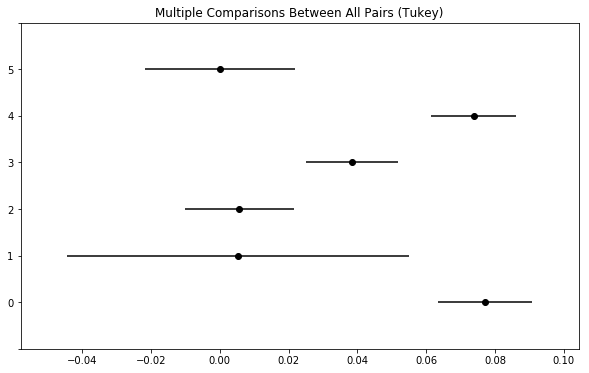

Dates_new
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  0      1    32.6369  25.4326  39.8413   True 
  0      2     -7.224  -10.5398 -3.9083   True 
  0      3    -0.8762  -3.8599   2.1076  False 
  0      4    -1.1975  -4.0177   1.6227  False 
  0      5    -3.4461  -7.5191   0.6269  False 
  1      2    -39.861  -47.1906 -32.5313  True 
  1      3    -33.5131 -40.6986 -26.3276  True 
  1      4    -33.8344 -40.9536 -26.7152  True 
  1      5    -36.0831 -43.7849 -28.3812  True 
  2      3     6.3479   3.0732   9.6226   True 
  2      4     6.0265   2.9001   9.153    True 
  2      5     3.7779  -0.5128   8.0686  False 
  3      4    -0.3213  -3.0931   2.4505  False 
  3      5     -2.57   -6.6096   1.4696  False 
  4      5    -2.2486  -6.1691   1.6718  False 
-----------------------------------------------


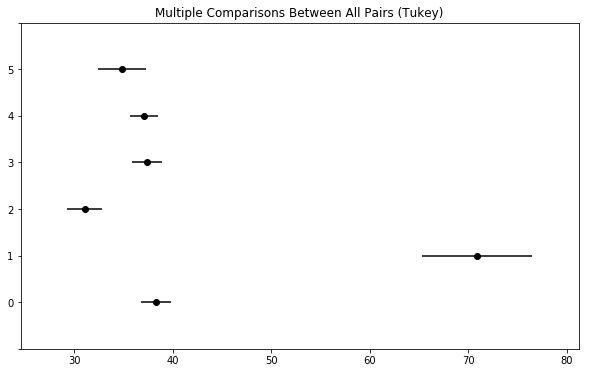

Title_Analyst
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.0106  -0.0517  0.0729 False 
  0      2    -0.0669  -0.0956 -0.0383  True 
  0      3    -0.0386  -0.0644 -0.0128  True 
  0      4    -0.0133  -0.0377  0.0111 False 
  0      5    -0.0043  -0.0395  0.0309 False 
  1      2    -0.0775  -0.1409 -0.0142  True 
  1      3    -0.0492  -0.1113  0.0129 False 
  1      4    -0.0239  -0.0854  0.0376 False 
  1      5    -0.0149  -0.0814  0.0517 False 
  2      3     0.0283    0.0    0.0566  True 
  2      4     0.0536   0.0266  0.0807  True 
  2      5     0.0627   0.0256  0.0997  True 
  3      4     0.0253   0.0013  0.0493  True 
  3      5     0.0343  -0.0006  0.0692 False 
  4      5     0.009   -0.0249  0.0429 False 
---------------------------------------------


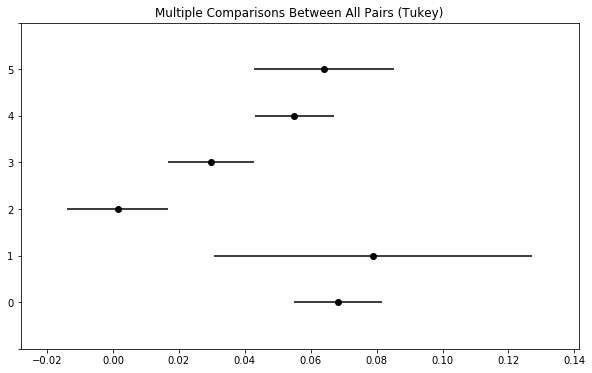

Title_Architect
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.0219  -0.0579  0.1016 False 
  0      2     0.0937   0.0569  0.1304  True 
  0      3     0.1564   0.1234  0.1894  True 
  0      4     0.0555   0.0243  0.0867  True 
  0      5     0.025   -0.0201  0.0701 False 
  1      2     0.0718  -0.0094  0.1529 False 
  1      3     0.1345   0.055   0.2141  True 
  1      4     0.0336  -0.0452  0.1124 False 
  1      5     0.0031  -0.0821  0.0884 False 
  2      3     0.0628   0.0265  0.099   True 
  2      4    -0.0382  -0.0728 -0.0036  True 
  2      5    -0.0686  -0.1161 -0.0211  True 
  3      4    -0.1009  -0.1316 -0.0703  True 
  3      5    -0.1314  -0.1761 -0.0867  True 
  4      5    -0.0305  -0.0739  0.0129 False 
---------------------------------------------


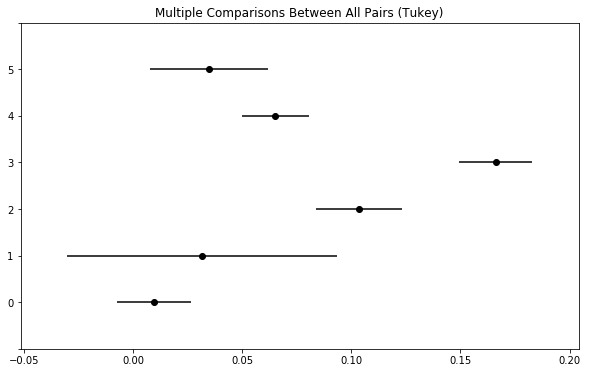

Title_Consultant
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     -0.014  -0.0647  0.0368 False 
  0      2    -0.0245  -0.0478 -0.0011  True 
  0      3     0.0072  -0.0138  0.0282 False 
  0      4     0.0216   0.0017  0.0414  True 
  0      5     0.0102  -0.0185  0.0389 False 
  1      2    -0.0105  -0.0621  0.0411 False 
  1      3     0.0212  -0.0294  0.0717 False 
  1      4     0.0355  -0.0146  0.0857 False 
  1      5     0.0242   -0.03   0.0784 False 
  2      3     0.0317   0.0086  0.0547  True 
  2      4     0.0461   0.0241  0.0681  True 
  2      5     0.0347   0.0045  0.0649  True 
  3      4     0.0144  -0.0051  0.0339 False 
  3      5     0.003   -0.0254  0.0315 False 
  4      5    -0.0114   -0.039  0.0162 False 
---------------------------------------------


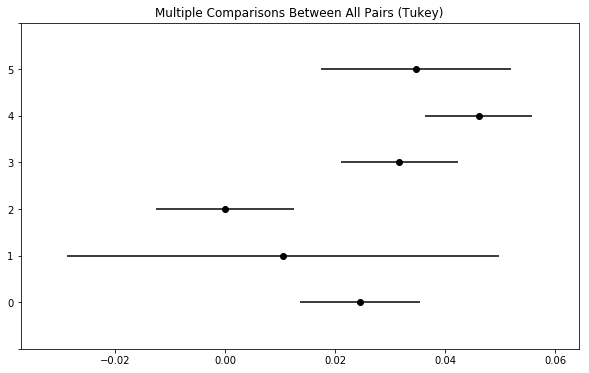

Title_Developer
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.1335   0.0099  0.2571  True 
  0      2    -0.2949  -0.3518  -0.238  True 
  0      3    -0.2292  -0.2804  -0.178  True 
  0      4    -0.0912  -0.1396 -0.0428  True 
  0      5    -0.0355  -0.1054  0.0344 False 
  1      2    -0.4285  -0.5542 -0.3027  True 
  1      3    -0.3627   -0.486 -0.2394  True 
  1      4    -0.2247  -0.3469 -0.1025  True 
  1      5     -0.169  -0.3011 -0.0368  True 
  2      3     0.0657   0.0095  0.1219  True 
  2      4     0.2038   0.1501  0.2574  True 
  2      5     0.2595   0.1858  0.3331  True 
  3      4     0.138    0.0904  0.1856  True 
  3      5     0.1937   0.1244  0.2631  True 
  4      5     0.0557  -0.0115  0.123  False 
---------------------------------------------


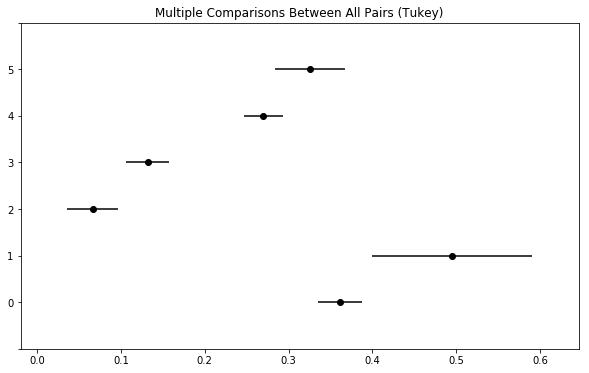

Title_Engineer
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.0019  -0.1093  0.113  False 
  0      2     0.0322  -0.0189  0.0834 False 
  0      3     -0.081   -0.127 -0.0349  True 
  0      4    -0.0888  -0.1323 -0.0453  True 
  0      5    -0.0511   -0.114  0.0117 False 
  1      2     0.0304  -0.0827  0.1434 False 
  1      3    -0.0828  -0.1937  0.028  False 
  1      4    -0.0907  -0.2005  0.0191 False 
  1      5     -0.053  -0.1718  0.0658 False 
  2      3    -0.1132  -0.1637 -0.0627  True 
  2      4    -0.1211  -0.1693 -0.0728  True 
  2      5    -0.0834  -0.1496 -0.0172  True 
  3      4    -0.0079  -0.0506  0.0349 False 
  3      5     0.0298  -0.0325  0.0922 False 
  4      5     0.0377  -0.0228  0.0982 False 
---------------------------------------------


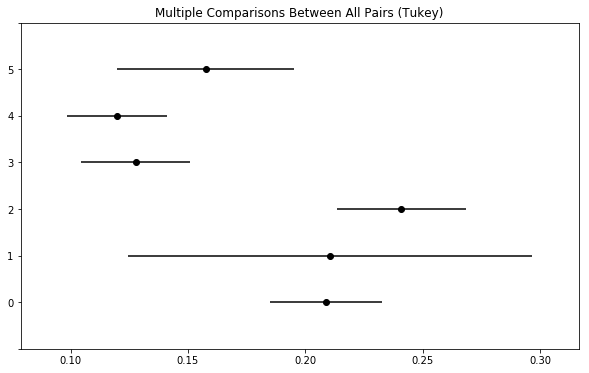

Title_Lead
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.0749  -0.2105  0.0607 False 
  0      2     0.2788   0.2164  0.3412  True 
  0      3     0.094    0.0379  0.1502  True 
  0      4     0.1018   0.0488  0.1549  True 
  0      5     0.1058   0.0292  0.1825  True 
  1      2     0.3536   0.2157  0.4916  True 
  1      3     0.1689   0.0337  0.3042  True 
  1      4     0.1767   0.0427  0.3107  True 
  1      5     0.1807   0.0357  0.3256  True 
  2      3    -0.1847  -0.2464 -0.1231  True 
  2      4    -0.1769  -0.2358 -0.1181  True 
  2      5     -0.173  -0.2537 -0.0922  True 
  3      4     0.0078  -0.0444   0.06  False 
  3      5     0.0118  -0.0643  0.0878 False 
  4      5     0.004   -0.0698  0.0778 False 
---------------------------------------------


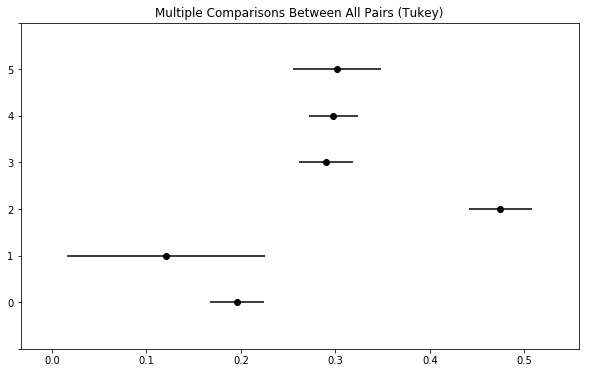

Title_Manager
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     -0.034  -0.1222  0.0541 False 
  0      2     0.0169  -0.0237  0.0575 False 
  0      3     0.1278   0.0913  0.1643  True 
  0      4     0.0404   0.0059  0.0749  True 
  0      5    -0.0137  -0.0636  0.0361 False 
  1      2     0.0509  -0.0388  0.1407 False 
  1      3     0.1619   0.0739  0.2498  True 
  1      4     0.0745  -0.0127  0.1616 False 
  1      5     0.0203  -0.0739  0.1146 False 
  2      3     0.1109   0.0708  0.151   True 
  2      4     0.0235  -0.0148  0.0618 False 
  2      5    -0.0306  -0.0831  0.0219 False 
  3      4    -0.0874  -0.1213 -0.0535  True 
  3      5    -0.1415   -0.191 -0.0921  True 
  4      5    -0.0541  -0.1021 -0.0061  True 
---------------------------------------------


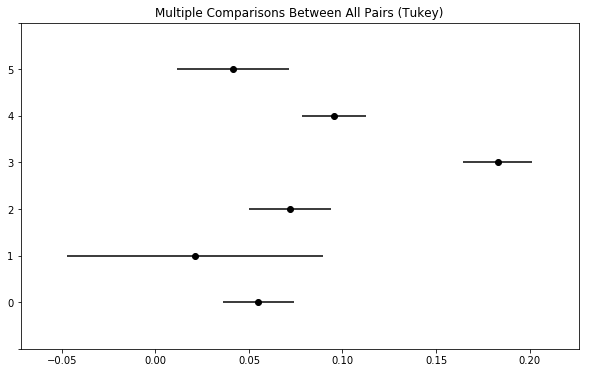

Title_Scientist
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     -0.045  -0.1113  0.0214 False 
  0      2    -0.0352  -0.0657 -0.0047  True 
  0      3    -0.0367  -0.0642 -0.0092  True 
  0      4     -0.026  -0.0519   0.0   False 
  0      5    -0.0365   -0.074  0.001  False 
  1      2     0.0098  -0.0577  0.0773 False 
  1      3     0.0083  -0.0579  0.0744 False 
  1      4     0.019   -0.0466  0.0845 False 
  1      5     0.0085  -0.0625  0.0794 False 
  2      3    -0.0015  -0.0317  0.0287 False 
  2      4     0.0092  -0.0196  0.038  False 
  2      5    -0.0013  -0.0408  0.0382 False 
  3      4     0.0107  -0.0148  0.0362 False 
  3      5     0.0002   -0.037  0.0374 False 
  4      5    -0.0105  -0.0466  0.0256 False 
---------------------------------------------


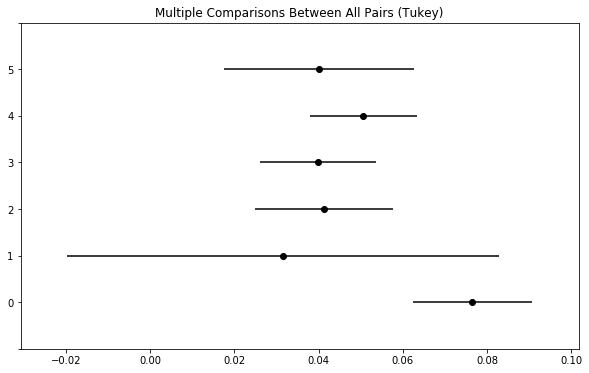

Exp_avg
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -2.7382  -3.4406 -2.0358  True 
  0      2     2.3692   2.046   2.6925  True 
  0      3     4.9195   4.6286  5.2105  True 
  0      4     2.3339   2.0589  2.6088  True 
  0      5     1.1939   0.7968  1.591   True 
  1      2     5.1074   4.3928  5.8221  True 
  1      3     7.6577   6.9572  8.3583  True 
  1      4     5.0721   4.3779  5.7662  True 
  1      5     3.9321   3.1811  4.683   True 
  2      3     2.5503   2.231   2.8696  True 
  2      4    -0.0354  -0.3402  0.2694 False 
  2      5    -1.1754  -1.5937  -0.757  True 
  3      4    -2.5857  -2.8559 -2.3154  True 
  3      5    -3.7257  -4.1195 -3.3318  True 
  4      5     -1.14   -1.5222 -0.7578  True 
---------------------------------------------


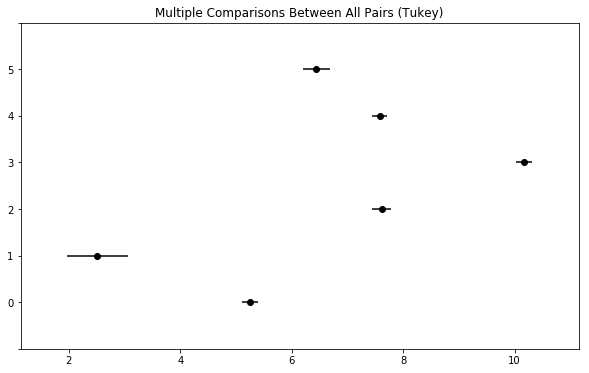

Predicted_Salary
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.209    -0.039  0.4569 False 
  0      2     2.9195   2.8054  3.0336  True 
  0      3     0.5373   0.4347   0.64   True 
  0      4     0.0201  -0.0769  0.1172 False 
  0      5     0.1058  -0.0344  0.2459 False 
  1      2     2.7105   2.4583  2.9628  True 
  1      3     0.3284   0.0811  0.5756  True 
  1      4    -0.1889  -0.4339  0.0561 False 
  1      5    -0.1032  -0.3683  0.1618 False 
  2      3    -2.3822  -2.4949 -2.2695  True 
  2      4    -2.8994   -3.007 -2.7918  True 
  2      5    -2.8138  -2.9614 -2.6661  True 
  3      4    -0.5172  -0.6126 -0.4218  True 
  3      5    -0.4316  -0.5706 -0.2926  True 
  4      5     0.0856  -0.0493  0.2206 False 
---------------------------------------------


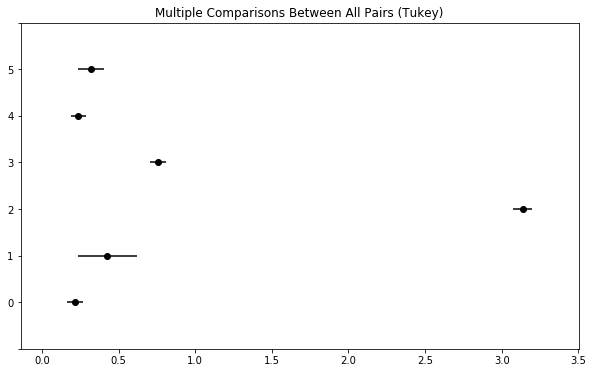

In [84]:
#6 Cluster model
Check=df_roles1.drop(['Skills_list','Title_new','Labels6'],axis=1)
for col in Check.columns:
    mc1=multi.MultiComparison(Check[col],df_roles1['Labels6'])
    res1=mc1.tukeyhsd(alpha=0.001)
    print col
    print res1.summary()
    res1.plot_simultaneous()
    plt.show()

In [139]:
df_roles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9055 entries, 0 to 11007
Data columns (total 23 columns):
Title_new      9055 non-null object
Exp_min        9055 non-null int64
Exp_max        9055 non-null int64
NCR            9055 non-null int64
Hyd            9055 non-null int64
Pune           9055 non-null int64
Mumbai         9055 non-null int64
Bangalore      9055 non-null int64
Chennai        9055 non-null int64
Ahmedabad      9055 non-null int64
Kolkata        9055 non-null int64
Kochi          9055 non-null int64
Hyderabad      9055 non-null int64
Jaipur         9055 non-null int64
Trivandrum     9055 non-null int64
Indore         9055 non-null int64
Coimbatore     9055 non-null int64
OthersLoc      9055 non-null float64
Skills_list    9055 non-null object
Dates_new      9055 non-null int64
Exp_avg        9055 non-null float64
Title          9055 non-null int64
Labels         9055 non-null int32
dtypes: float64(2), int32(1), int64(18), object(2)
memory usage: 1.9+ MB


In [261]:
#Testing for key skills differences
from collections import Counter
list1=[]
list0=[]
list2=[]
list3=[]
list4=[]
list5=[]

for x in df_roles[df_roles['Labels6']==1]['Skills_list']:
    list1+=x
for x in df_roles[df_roles['Labels6']==0]['Skills_list']:
    list0+=x
for x in df_roles[df_roles['Labels6']==2]['Skills_list']:
    list2+=x
for x in df_roles[df_roles['Labels6']==3]['Skills_list']:
    list3+=x
for x in df_roles[df_roles['Labels6']==4]['Skills_list']:
    list4+=x
for x in df_roles[df_roles['Labels6']==5]['Skills_list']:
    list5+=x
for x in range(len(list1)):
    if 'SQL' in list1[x]:
        list1[x]='SQL'
    if 'Java' in list1[x]:
        list1[x]='Java'
    if 'HTML' in list1[x]:
        list1[x]='HTML'
for x in range(len(list0)):
    if 'SQL' in list0[x]:
        list0[x]='SQL'
    if 'Java' in list0[x]:
        list0[x]='Java'
    if 'HTML' in list0[x]:
        list0[x]='HTML'
for x in range(len(list2)):
    if 'SQL' in list2[x]:
        list2[x]='SQL'
    if 'Java' in list2[x]:
        list2[x]='Java'
    if 'HTML' in list2[x]:
        list2[x]='HTML'
for x in range(len(list3)):
    if 'SQL' in list3[x]:
        list3[x]='SQL'
    if 'Java' in list3[x]:
        list3[x]='Java'
    if 'HTML' in list3[x]:
        list3[x]='HTML'
for x in range(len(list4)):
    if 'SQL' in list4[x]:
        list4[x]='SQL'
    if 'Java' in list4[x]:
        list4[x]='Java'
    if 'HTML' in list4[x]:
        list4[x]='HTML'
for x in range(len(list5)):
    if 'SQL' in list5[x]:
        list5[x]='SQL'
    if 'Java' in list5[x]:
        list5[x]='Java'
    if 'HTML' in list5[x]:
        list5[x]='HTML'
labels1, values1 = zip(*Counter(list1).items())
labels0, values0 = zip(*Counter(list0).items())
labels2, values2 = zip(*Counter(list2).items())
labels3, values3 = zip(*Counter(list3).items())
labels4, values4 = zip(*Counter(list4).items())
labels5, values5 = zip(*Counter(list5).items())
sum1=float(np.sum(values1))
sum0=float(np.sum(values0))
sum2=float(np.sum(values2))
sum3=float(np.sum(values3))
sum4=float(np.sum(values4))
sum5=float(np.sum(values5))
pd1=pd.DataFrame([labels0,values0],index=['Label','Values']).T.sort_values('Values',ascending=False)
pd1=pd1.drop(0)
pd1['Values_per']=pd1['Values']/(sum0)*100
print "Cluster 0"
print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
print "--------------------------------"
pd1=pd.DataFrame([labels1,values1],index=['Label','Values']).T.sort_values('Values',ascending=False)
pd1=pd1.drop(0)
pd1['Values_per']=pd1['Values']/(sum0)*100
print "Cluster 1"
print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
print "--------------------------------"
pd1=pd.DataFrame([labels2,values2],index=['Label','Values']).T.sort_values('Values',ascending=False)
pd1=pd1.drop(0)
pd1['Values_per']=pd1['Values']/(sum2)*100
print "Cluster 2"
print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
print "--------------------------------"
pd1=pd.DataFrame([labels3,values3],index=['Label','Values']).T.sort_values('Values',ascending=False)
pd1=pd1.drop(0)
pd1['Values_per']=pd1['Values']/(sum3)*100
print "Cluster 3"
print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
print "--------------------------------"
pd1=pd.DataFrame([labels4,values4],index=['Label','Values']).T.sort_values('Values',ascending=False)
pd1=pd1.drop(0)
pd1['Values_per']=pd1['Values']/(sum4)*100
print "Cluster 4"
print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
print "--------------------------------"
pd1=pd.DataFrame([labels5,values5],index=['Label','Values']).T.sort_values('Values',ascending=False)
pd1=pd1.drop(0)
pd1['Values_per']=pd1['Values']/(sum5)*100
print "Cluster 5"
print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
print "--------------------------------"

Cluster 0
            Label Values_per
1739          SQL    8.63016
1719         Java    4.43752
1380       Python    2.80499
1549         HTML    2.03324
92     Algorithms    1.46186
851        Oracle    1.17988
1810          XML    0.86821
593         Linux    0.86821
1854            C   0.831107
368           PHP   0.756901
--------------------------------
Cluster 1
                  Label Values_per
50                  SQL    1.54348
14    software engineer   0.512021
15              fresher   0.415554
57                 Java   0.408133
17                    C   0.304245
217                 MVC   0.259721
209             grauate   0.230039
110                  C#   0.230039
192          programmer   0.200356
91        web developer   0.170674
--------------------------------
Cluster 2
            Label Values_per
1933          SQL    7.85572
1421         Java    5.04785
1143       Python    3.13387
72     Algorithms    1.71417
1578         HTML    1.70365
710        Oracle    1.051